# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [180]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [181]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [182]:
# Load the dataset

try:
    df = pd.read_csv('/content/Employee_data.csv')
except FileNotFoundError:
    print("Error: 'Employee_data.csv' not found. Please check the file path.")
    raise
except pd.errors.ParserError:
    print("Error: Unable to parse CSV file. Check file format.")
    raise

In [183]:
# Check the first few entries

df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [184]:
# Inspect the shape of the dataset

df.shape

(74610, 24)

In [185]:
# Inspect the different columns in the dataset

df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [186]:
 # Check the summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.3 Check the data type of columns**

In [187]:
# Check the info to see the types of the feature variables and the null values present

df.dtypes
# Check for the null values**
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [188]:
# Check the number of missing values in each column

df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [189]:
# Check the percentage of missing values in each column

(df.isnull().sum()/len(df))*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [190]:
# Handle the missing value rows in the column
df['Distance from Home'].fillna(df['Distance from Home'].median(), inplace=True)
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median(), inplace=True)
print("Missing values in df:\n", df.isnull().sum())

Missing values in df:
 Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [191]:
# Check the percentage of remaining data after missing values are removed

remaining_percentage = (len(df) / 74610) * 100
print(f"Percentage of remaining data: {remaining_percentage:.2f}%")

Percentage of remaining data: 100.00%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [192]:
# Write a function to display the categorical columns with their unique values and check for redundant values

def check_categorical_values(df):
  """
  Displays categorical columns with their unique values and checks for redundancy.

  Args:
    df: The input pandas DataFrame.
  """
  categorical_cols = df.select_dtypes(include='object').columns

  print("Categorical Columns and Unique Values:")
  for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"- {col}: {unique_values}")
    # Optional: Add a check for potentially redundant values based on specific patterns
    # For example, checking for variations in capitalization, extra spaces, etc.
    # You might need to customize this check based on your data's characteristics.
    # Example: check for lowercase versions
    if len(unique_values) != len(df[col].str.lower().unique()):
      print(f"  Potential redundancy found in '{col}' (case variations).")
    # Example: check for leading/trailing whitespace
    if len(unique_values) != len(df[col].str.strip().unique()):
       print(f"  Potential redundancy found in '{col}' (whitespace).")

check_categorical_values(df)

# Fix encoding issues in 'Education Level' column
df['Education Level'] = df['Education Level'].str.replace('â€™', "'", regex=False)

#check unique values after cleaning
print('Education Level :',df['Education Level'].unique())

Categorical Columns and Unique Values:
- Gender: ['Male' 'Female']
- Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
- Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
- Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
- Performance Rating: ['Average' 'Low' 'High' 'Below Average']
- Overtime: ['No' 'Yes']
- Education Level: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
- Marital Status: ['Married' 'Divorced' 'Single']
- Job Level: ['Mid' 'Senior' 'Entry']
- Company Size: ['Medium' 'Small' 'Large']
- Remote Work: ['No' 'Yes']
- Leadership Opportunities: ['No' 'Yes']
- Innovation Opportunities: ['No' 'Yes']
- Company Reputation: ['Excellent' 'Fair' 'Poor' 'Good']
- Employee Recognition: ['Medium' 'Low' 'High' 'Very High']
- Attrition: ['Stayed' 'Left']
Education Level : ['Associate Degree' "Master's Degree" "Bachelor's Degree" 'High School'
 'PhD']


In [193]:
# Check the data

df.head()
df.shape
df.columns
df.info()
df.dtypes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          74610 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

Employee ID                   0
Age                           0
Gender                        0
Years at Company              0
Job Role                      0
Monthly Income                0
Work-Life Balance             0
Job Satisfaction              0
Performance Rating            0
Number of Promotions          0
Overtime                      0
Distance from Home            0
Education Level               0
Marital Status                0
Number of Dependents          0
Job Level                     0
Company Size                  0
Company Tenure (In Months)    0
Remote Work                   0
Leadership Opportunities      0
Innovation Opportunities      0
Company Reputation            0
Employee Recognition          0
Attrition                     0
dtype: int64

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [194]:
# Drop redundant columns which are not required for modelling

# Dropping the 'Employee ID' column as it's a unique identifier and not useful for modeling
df.drop('Employee ID', axis=1, inplace=True)

# Print the shape of the dataframe to confirm the column has been dropped
df.shape

(74610, 23)

In [195]:
# Check first few rows of data

df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0       Mid       Medium   
1       No  ...                     3       Mid       Medium   
2       No  ...                     3       Mid       Medium   
3       No  ...                     2       Mid        Small   
4      Yes  ...                     0    Senior       Medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          No                       No   
1                        21.0          No                       No   
2                        74.0          No                       No   
3                        50.0         Yes                       No   
4                        68.0          No                       No   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        No          Excellent               Medium    Stayed  
1                        No               Fair                  Low    Stayed  
2                        No               Poor                  Low    Stayed  
3                        No               Good               Medium    Stayed  
4                        No               Fair               Medium    Stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [196]:
# Import Train Test Split

from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [197]:
# Put all the feature variables in X
# Put the target variable in y

# Encode target variable
y = df['Attrition'].map({'Stayed': 1, 'Left': 0})  # Binary encoding
print("y unique values:", y.unique())
print("y NaNs:", y.isnull().sum())

# Split data
X = df.drop('Attrition', axis=1)


y unique values: [1 0]
y NaNs: 0


### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [198]:
# Split the data into 70% train data and 30% validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

# Debug y_val
print("y_val type:", type(y_val))
print("y_val head:\n", y_val.head())
print("y_val unique values:", y_val.unique())
print("y_val NaNs:", y_val.isnull().sum())

Training set shape: (52227, 22) (52227,)
Validation set shape: (22383, 22) (22383,)
y_val type: <class 'pandas.core.series.Series'>
y_val head:
 61298    0
46813    1
37033    0
41834    1
25905    1
Name: Attrition, dtype: int64
y_val unique values: [0 1]
y_val NaNs: 0


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [199]:
# Select numerical columns
numerical_cols_train = X_train.select_dtypes(include=np.number).columns
print("Numerical columns in training data:")
numerical_cols_train

Numerical columns in training data:


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

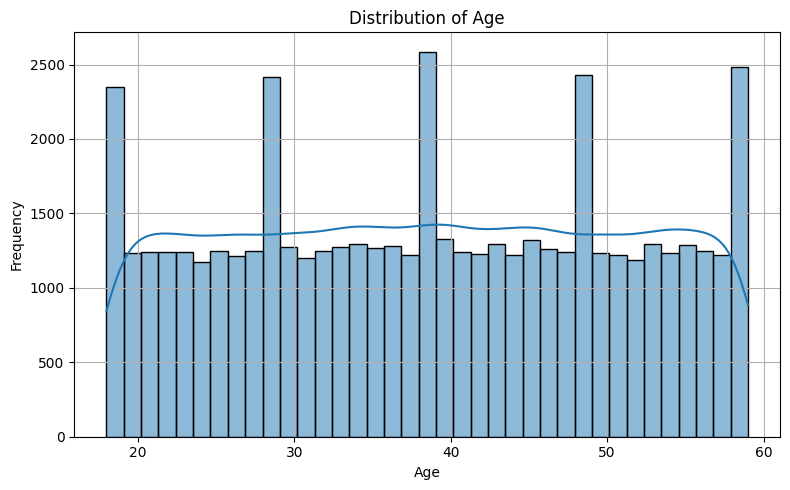

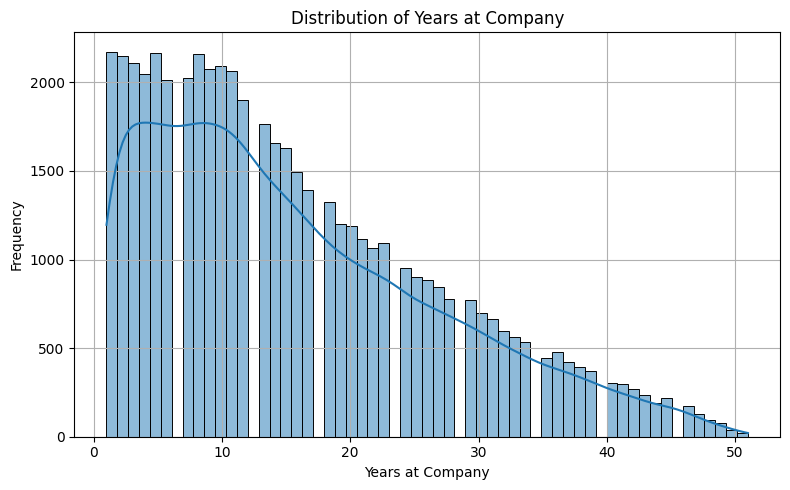

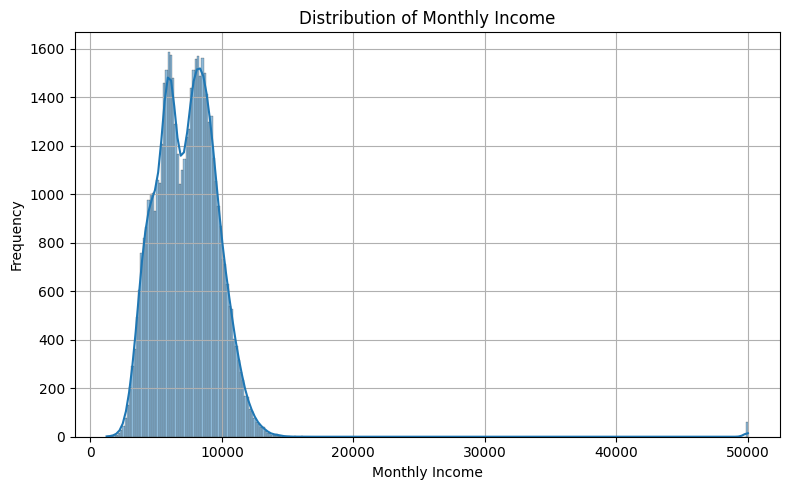

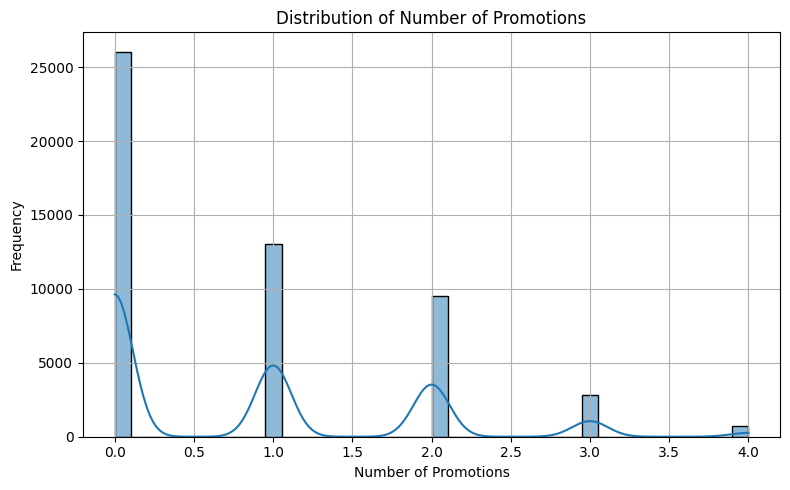

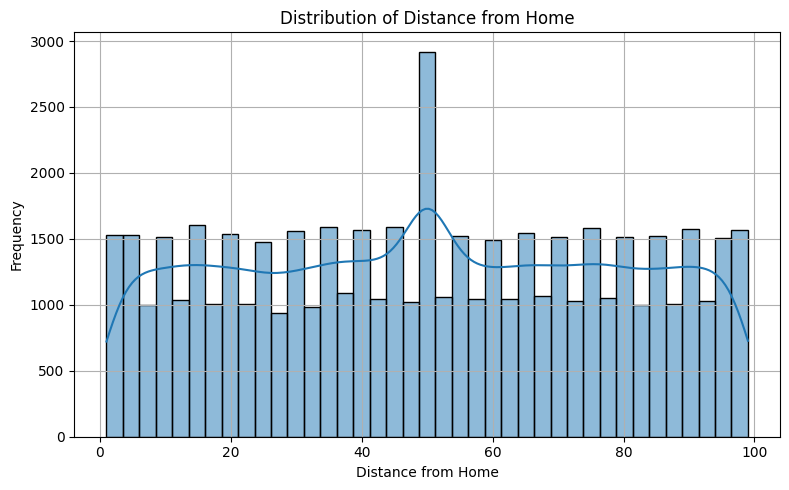

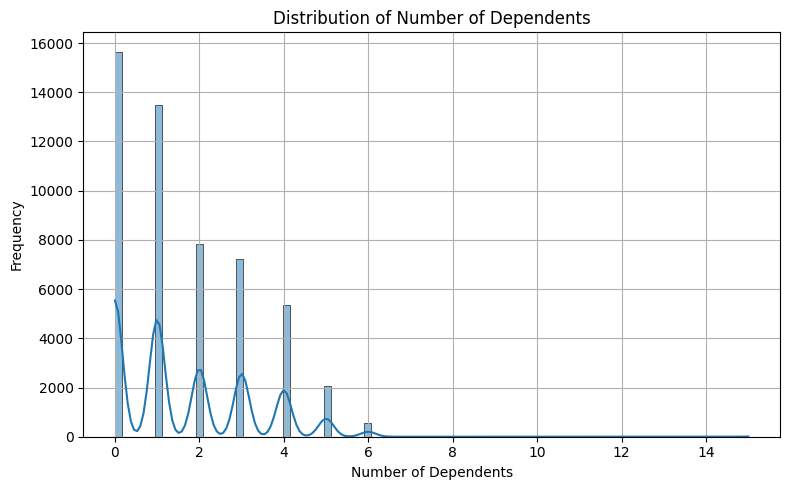

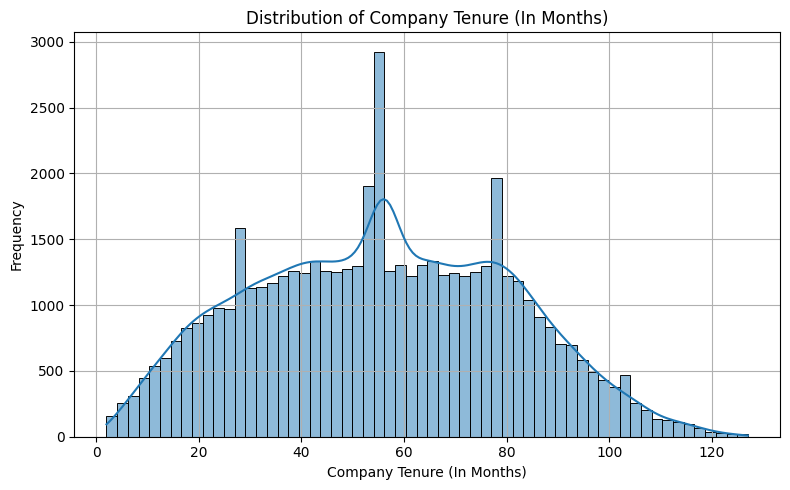

In [200]:
# Plot all the numerical columns to understand their distribution
# # Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting distribution of numerical columns
for col in numerical_cols_train:
    plt.figure(figsize=(8, 5))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

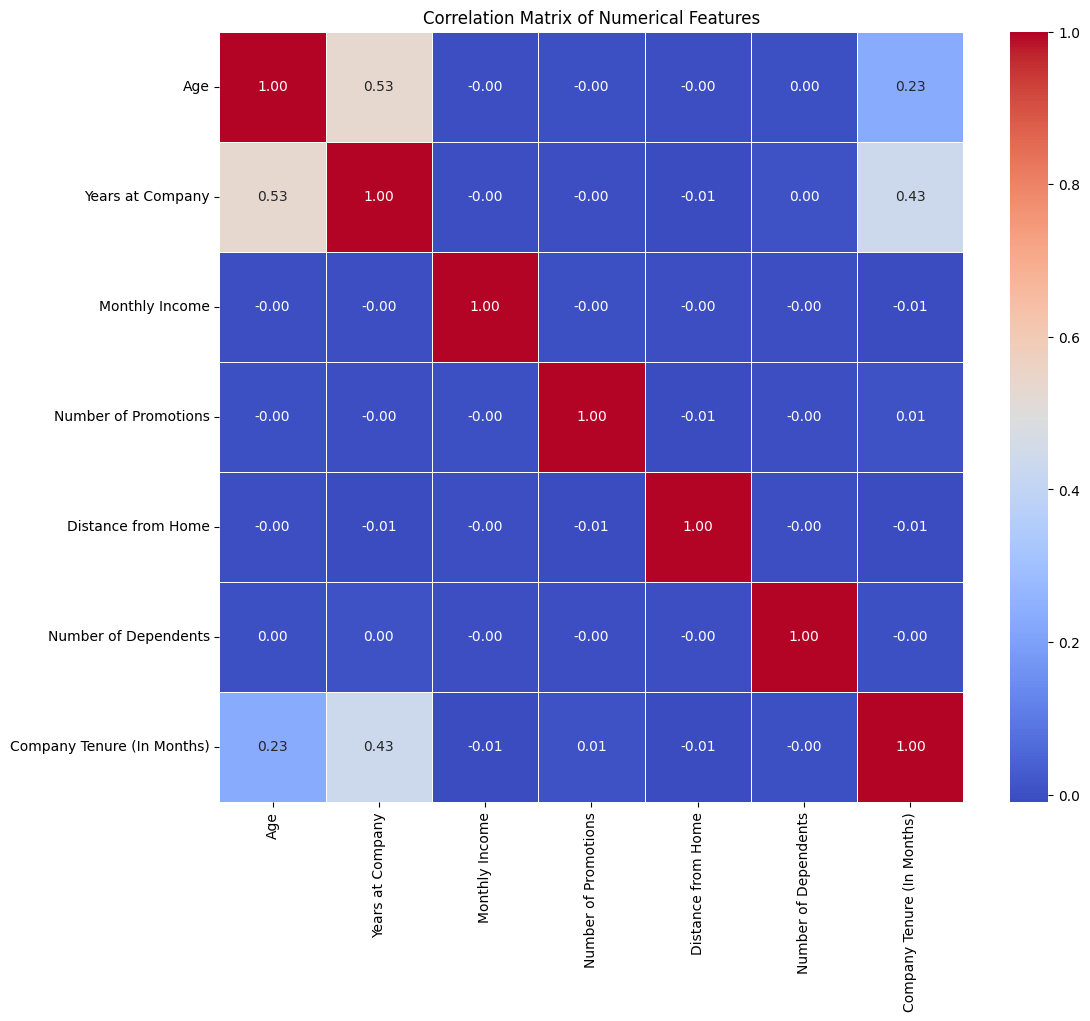

In [201]:
# Create correlation matrix for numerical columns
# # Plot Heatmap of the correlation matrix

import matplotlib.pyplot as plt
correlation_matrix = X_train[numerical_cols_train].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

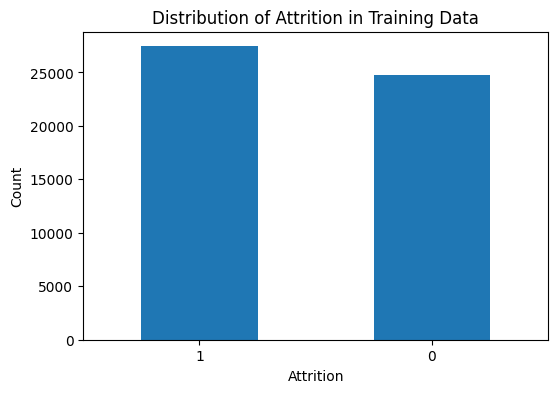

In [202]:
# Plot a bar chart to check class balance

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of Attrition in Training Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

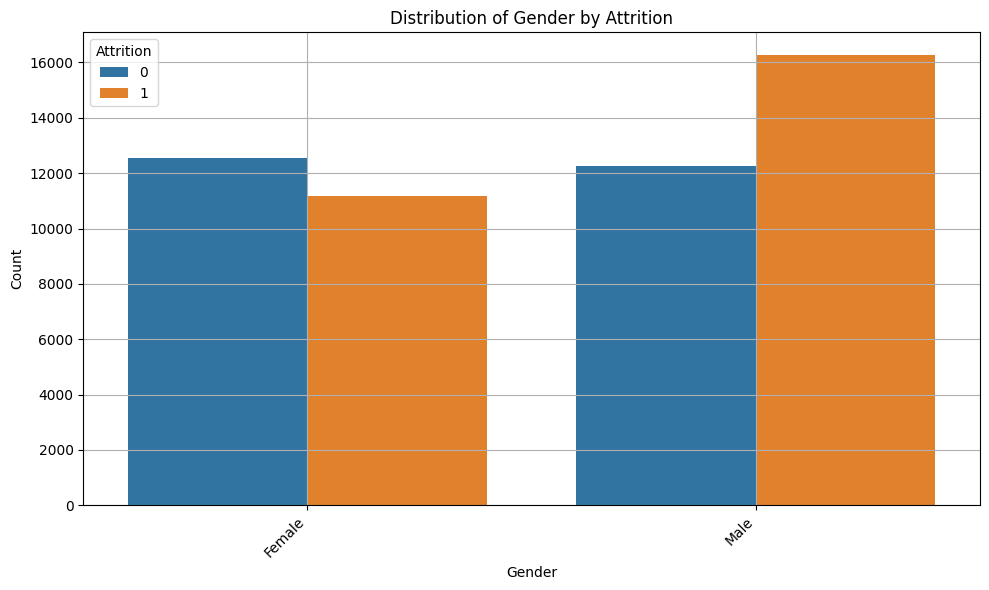

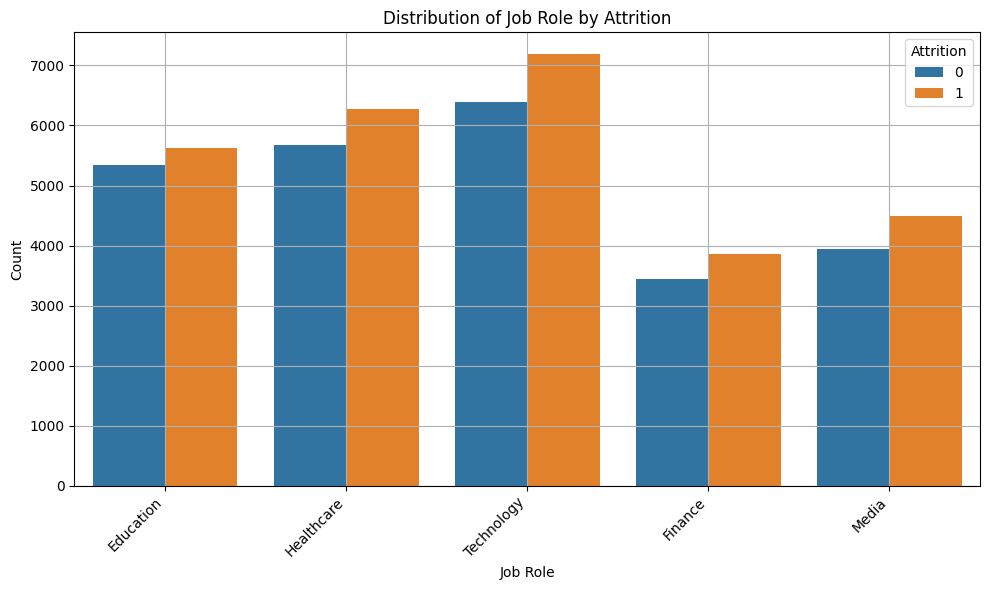

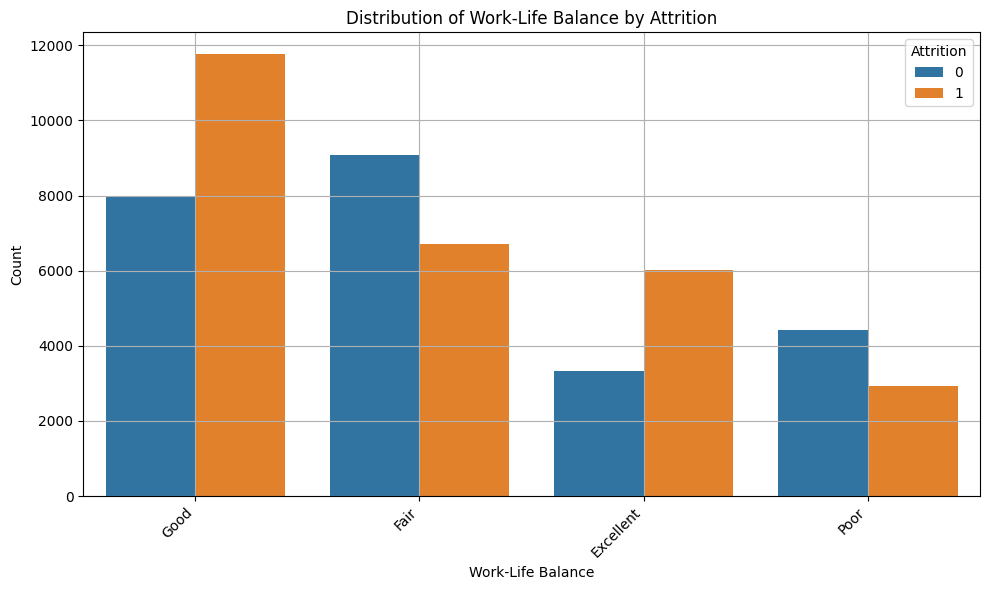

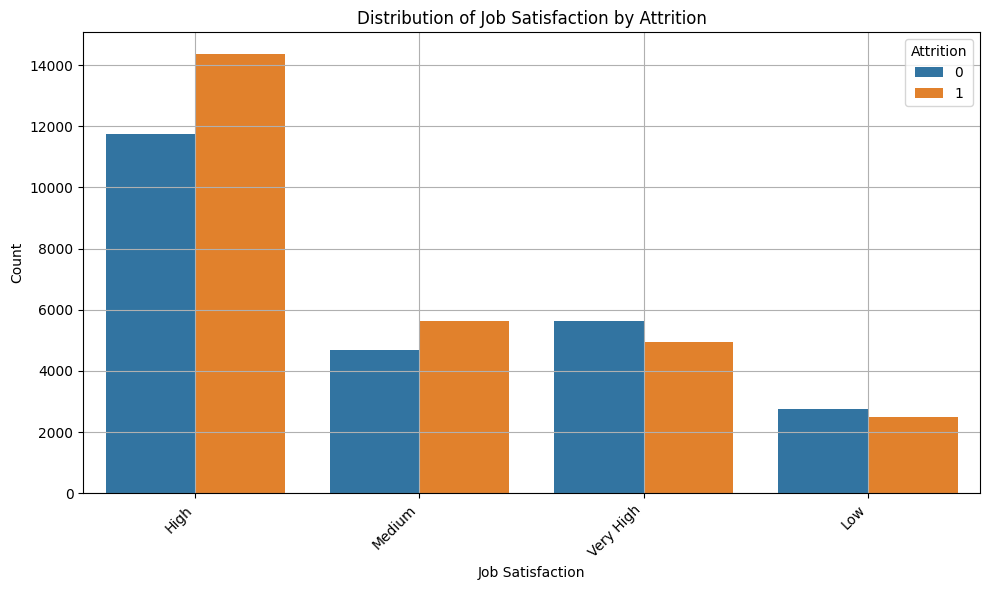

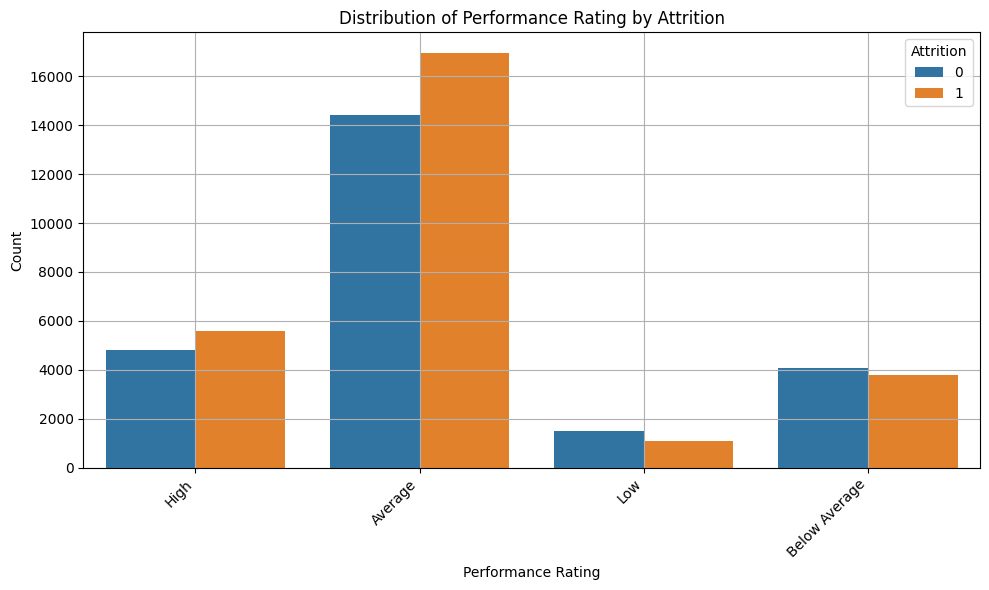

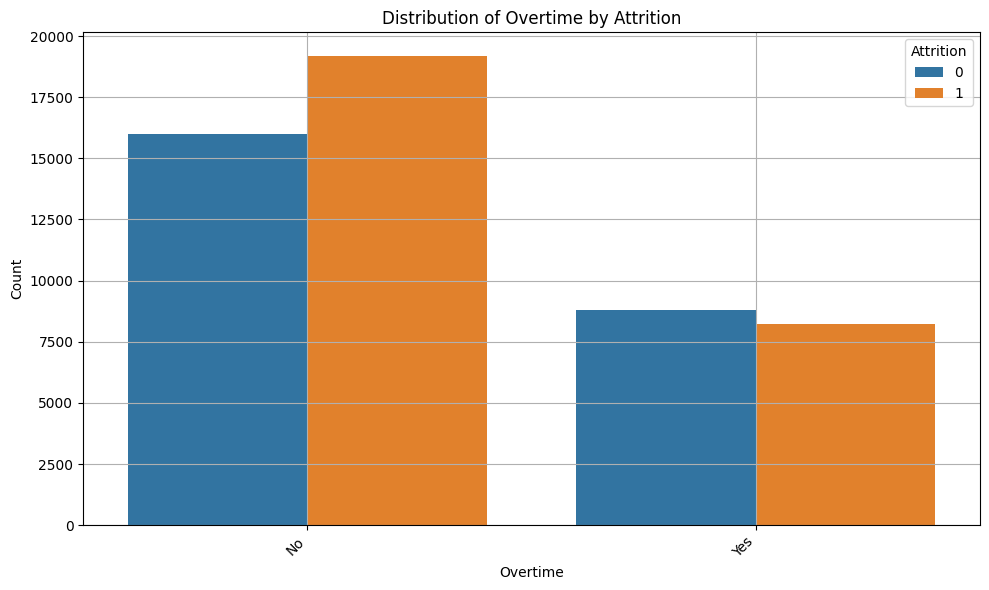

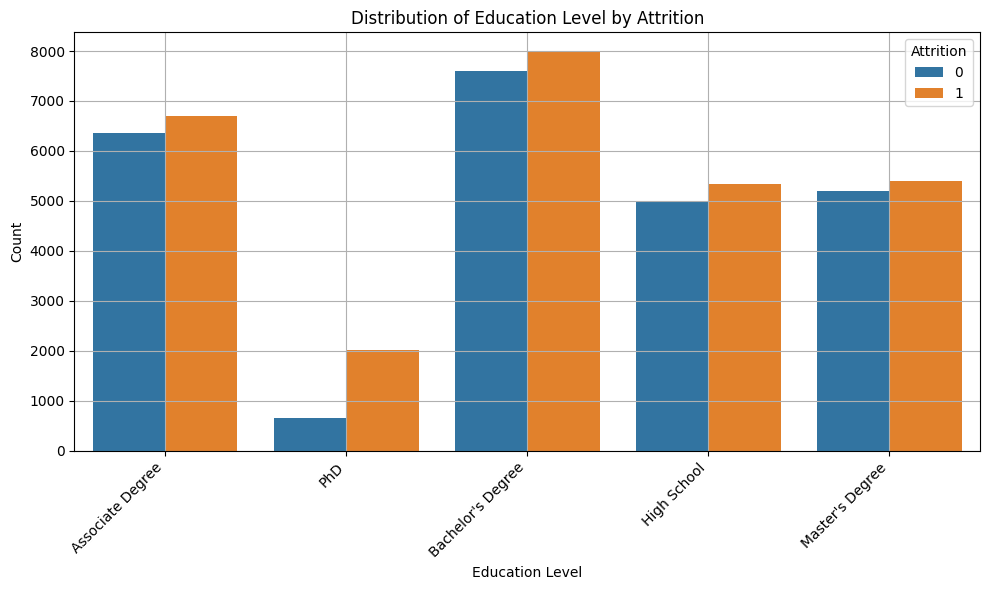

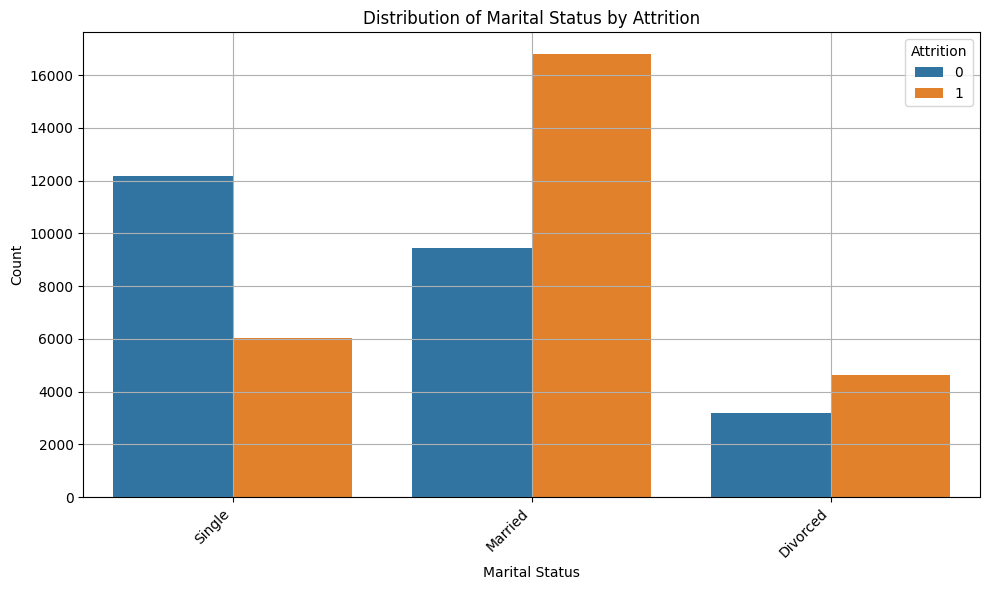

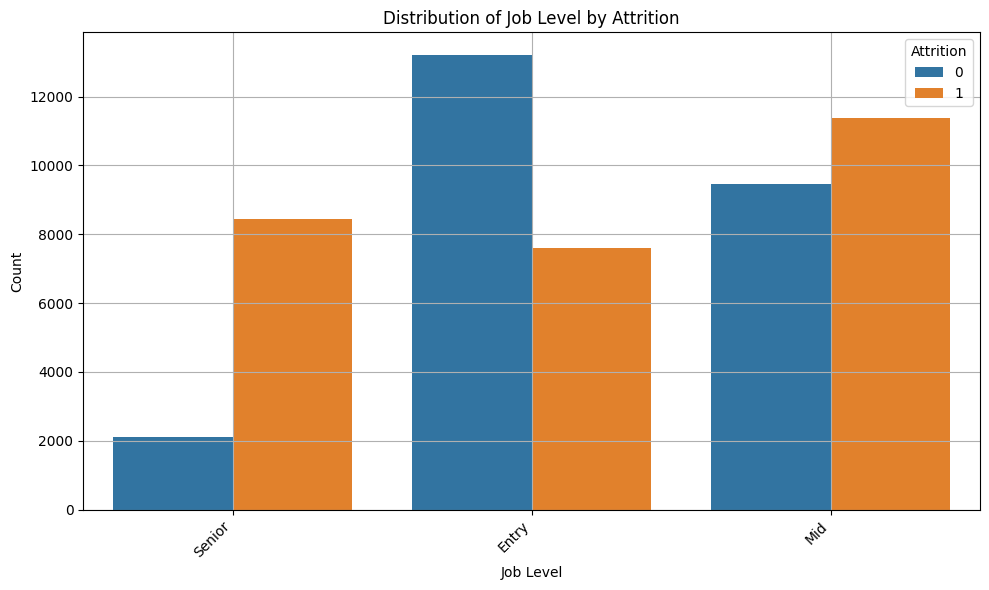

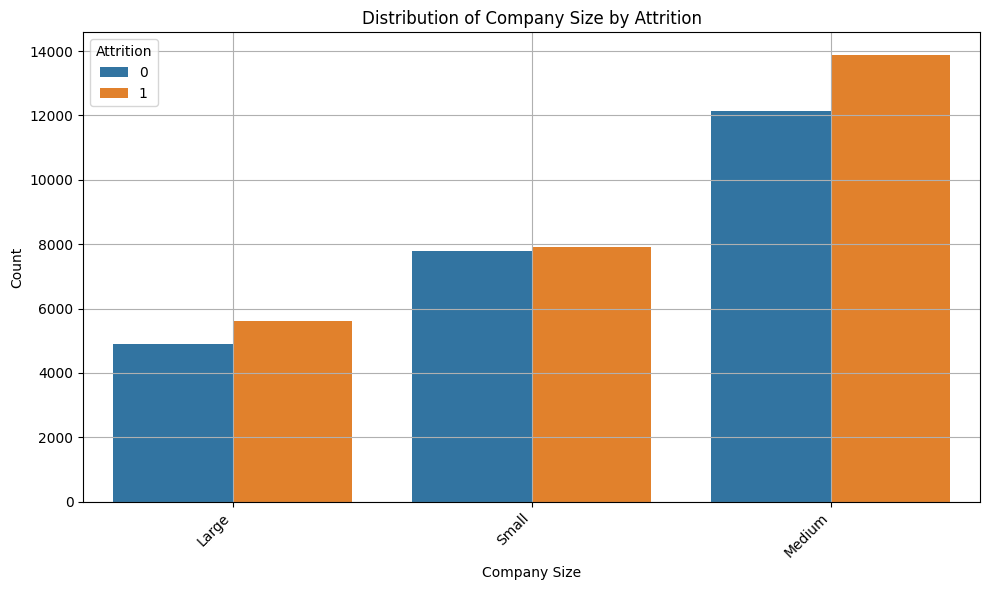

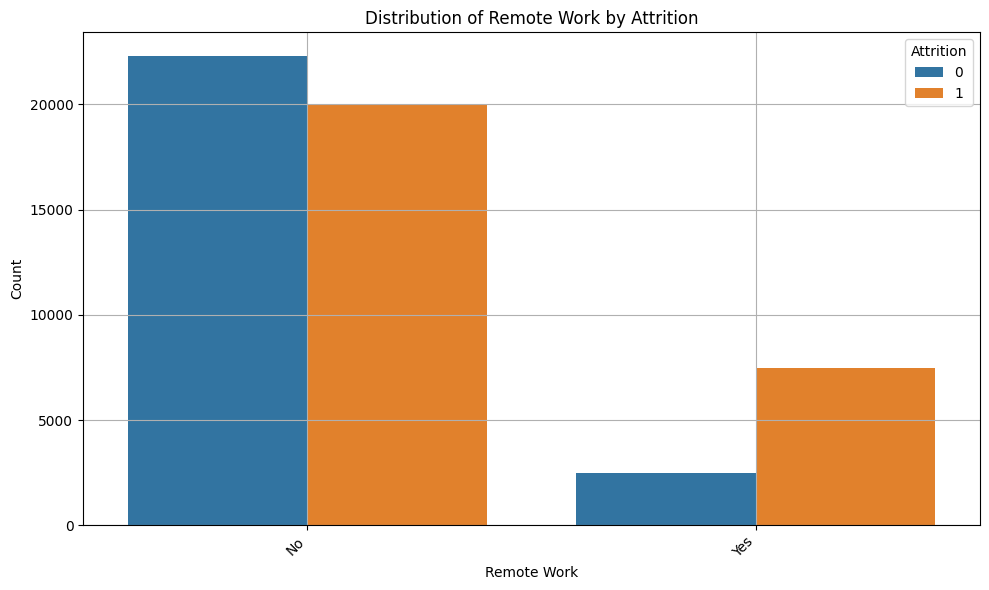

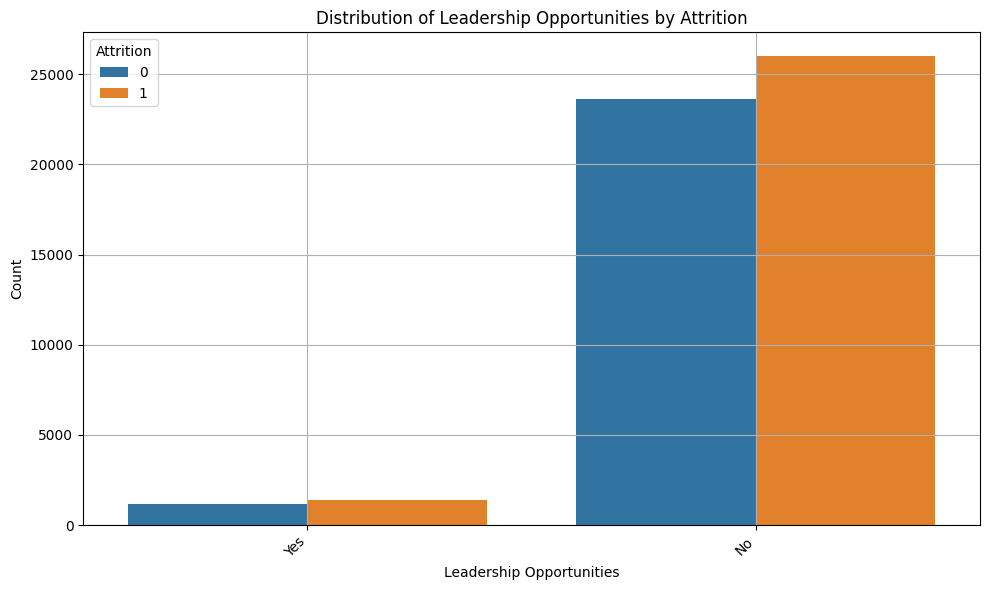

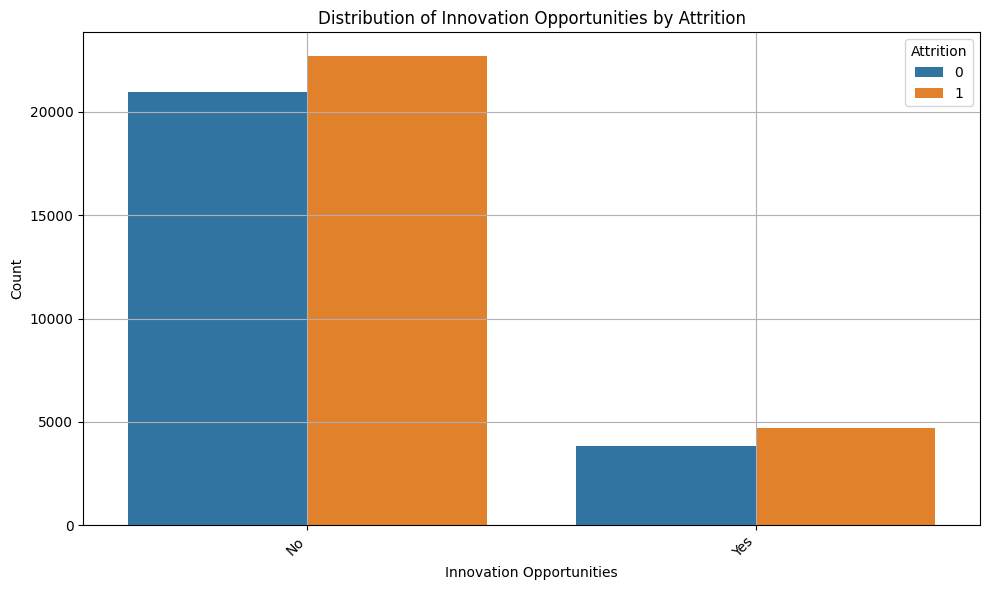

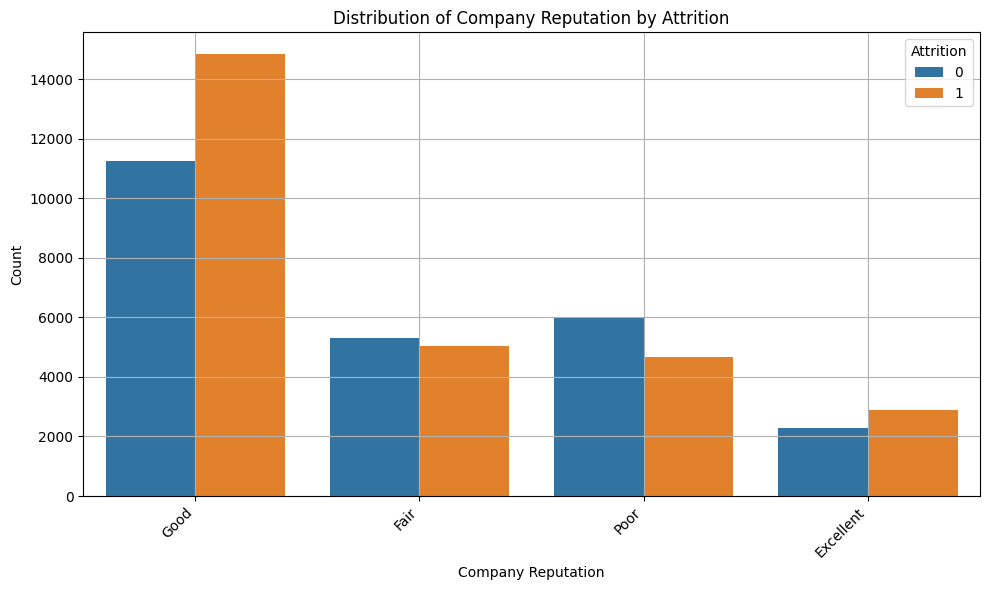

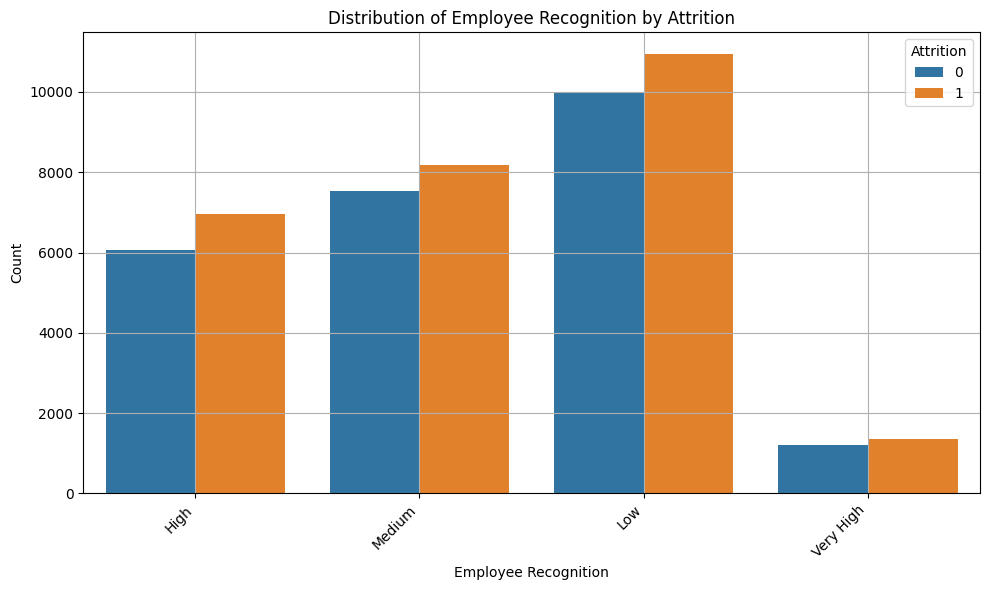

In [203]:
# Plot distribution for each categorical column with target variable

import pandas as pd
import matplotlib.pyplot as plt
# Select categorical columns from training data
categorical_cols_train = X_train.select_dtypes(include='object').columns

# Plot distribution for each categorical column with target variable
for col in categorical_cols_train:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=pd.concat([X_train, y_train], axis=1), x=col, hue='Attrition')
    plt.title(f'Distribution of {col} by Attrition')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [204]:
# Select numerical columns

import numpy as np
numerical_cols_val = X_val.select_dtypes(include=np.number).columns
print("Numerical columns in validation data:")
numerical_cols_val

Numerical columns in validation data:


Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

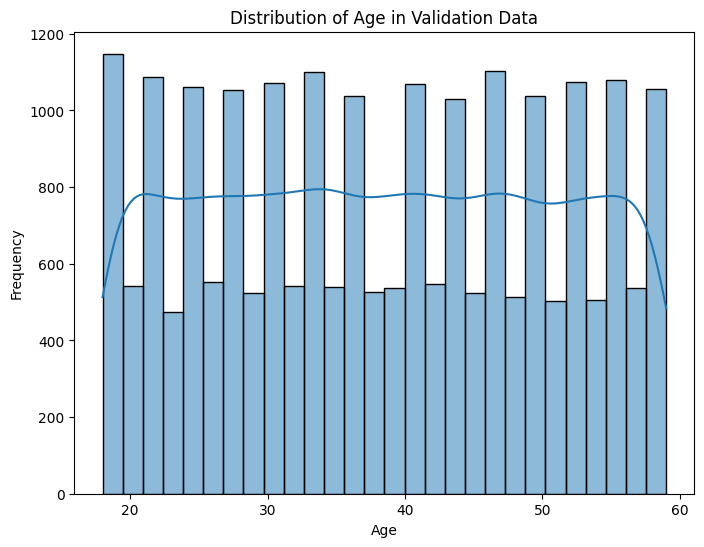

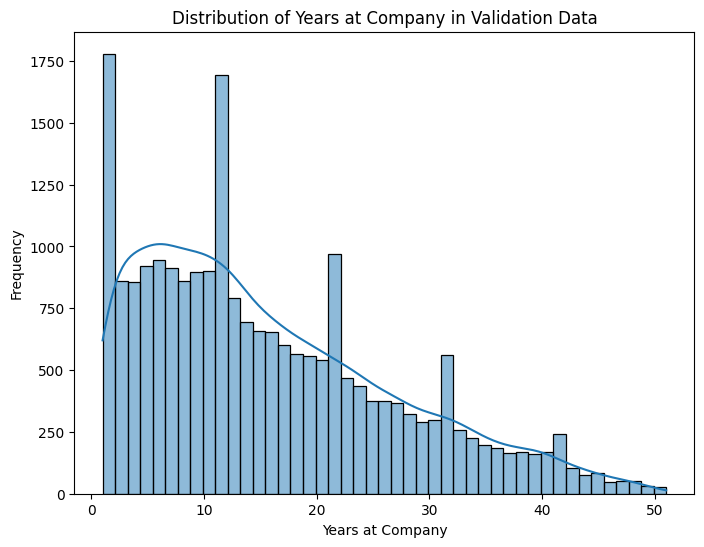

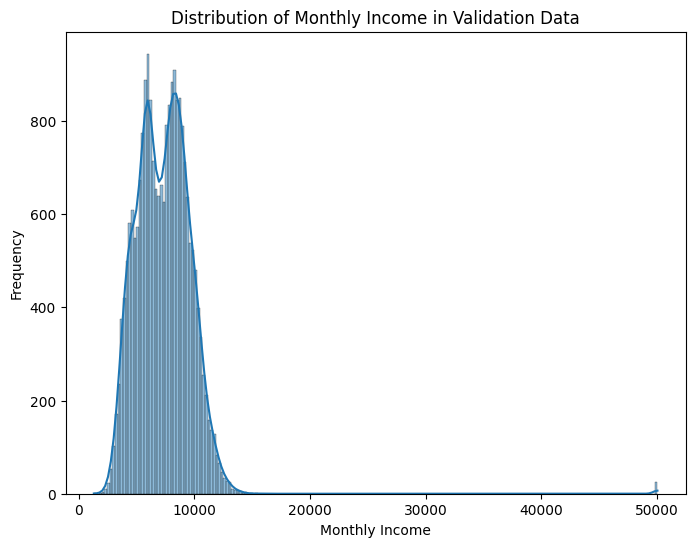

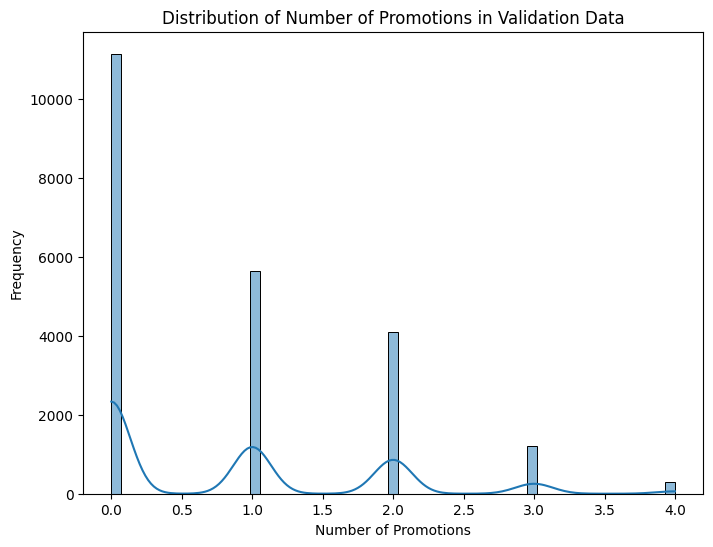

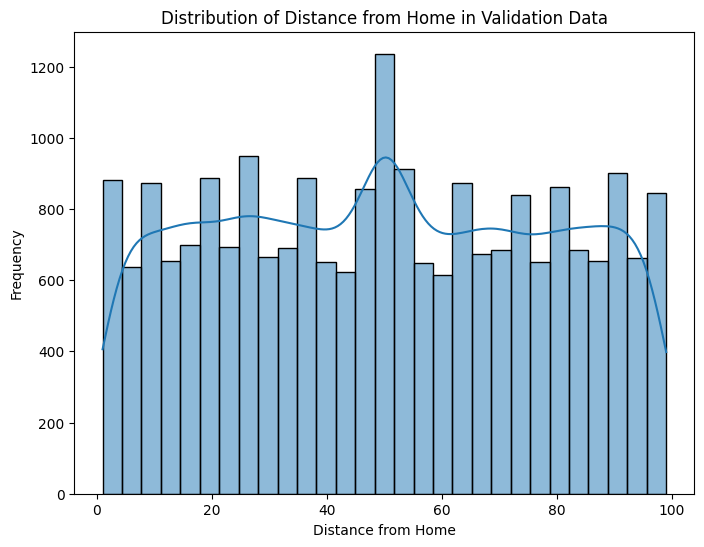

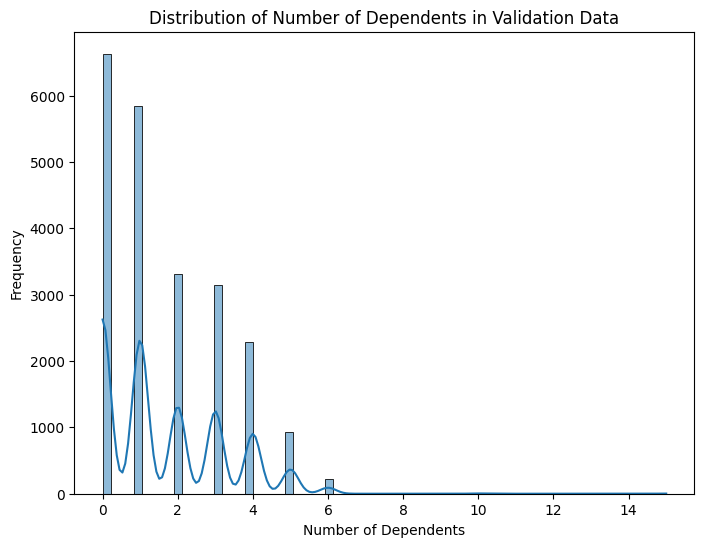

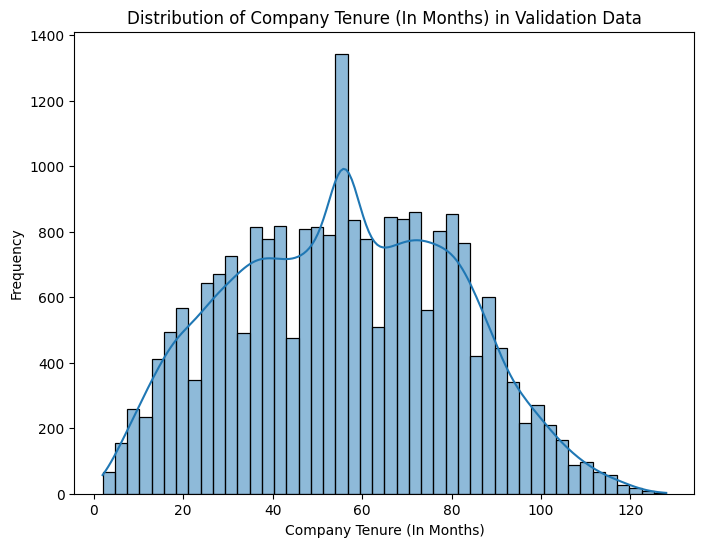

In [205]:
# Plot all the numerical columns to understand their distribution

import matplotlib.pyplot as plt
# Plotting distribution of numerical columns
for col in numerical_cols_val:
  plt.figure(figsize=(8, 6))
  sns.histplot(X_val[col], kde=True)
  plt.title(f'Distribution of {col} in Validation Data')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

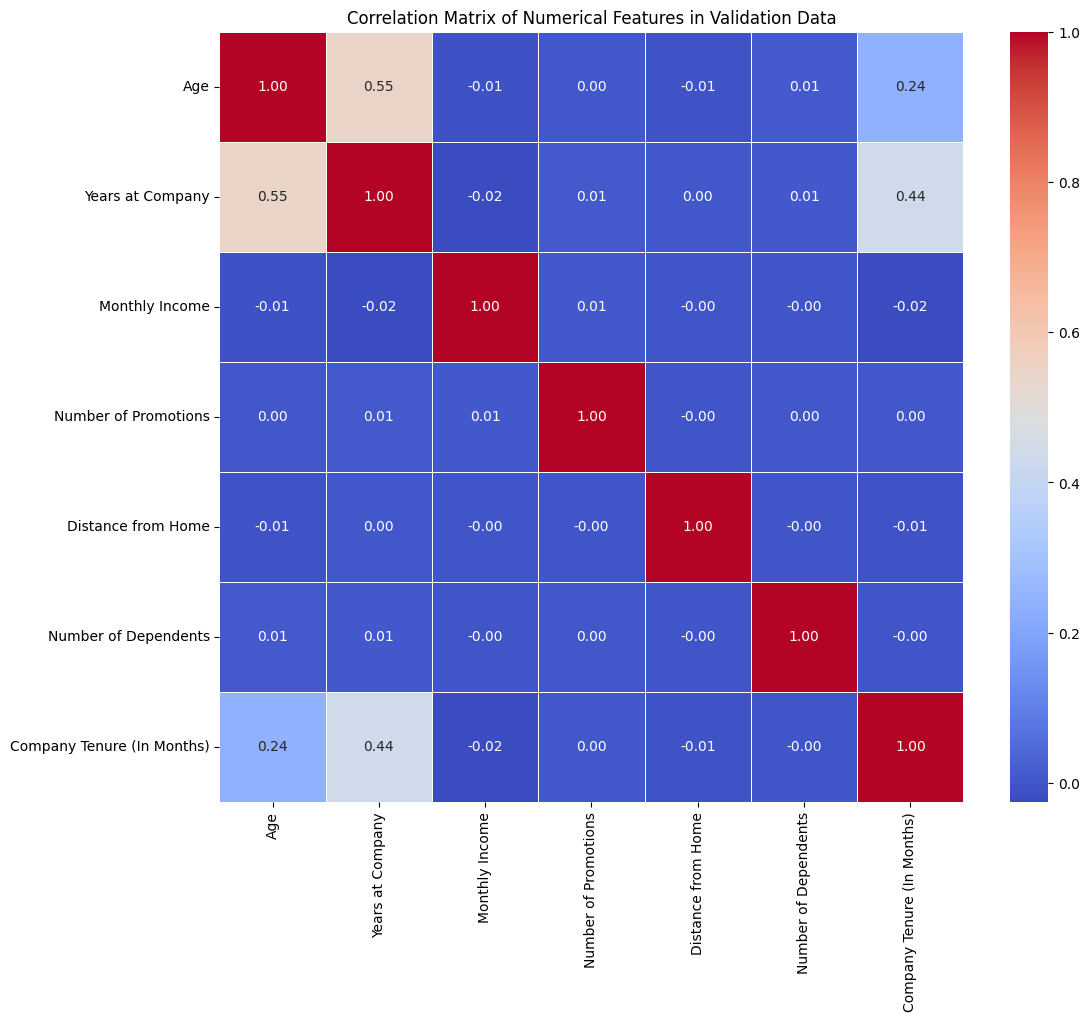

In [206]:
# Create correlation matrix for numerical columns
# # Plot Heatmap of the correlation matrix

import matplotlib.pyplot as plt
correlation_matrix = X_val[numerical_cols_val].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features in Validation Data')
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

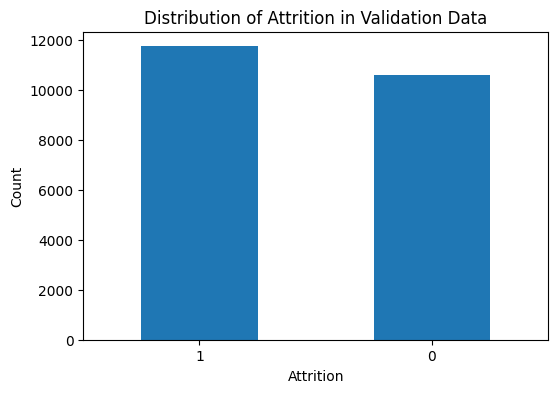

In [207]:
# Plot a bar chart to check class balance

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
y_val.value_counts().plot(kind='bar')
plt.title('Distribution of Attrition in Validation Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

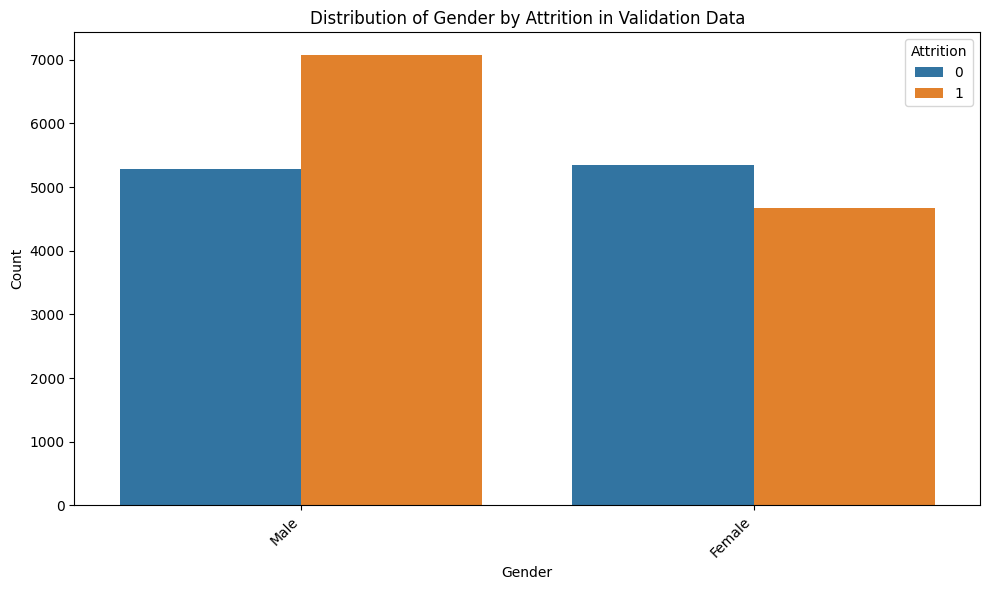

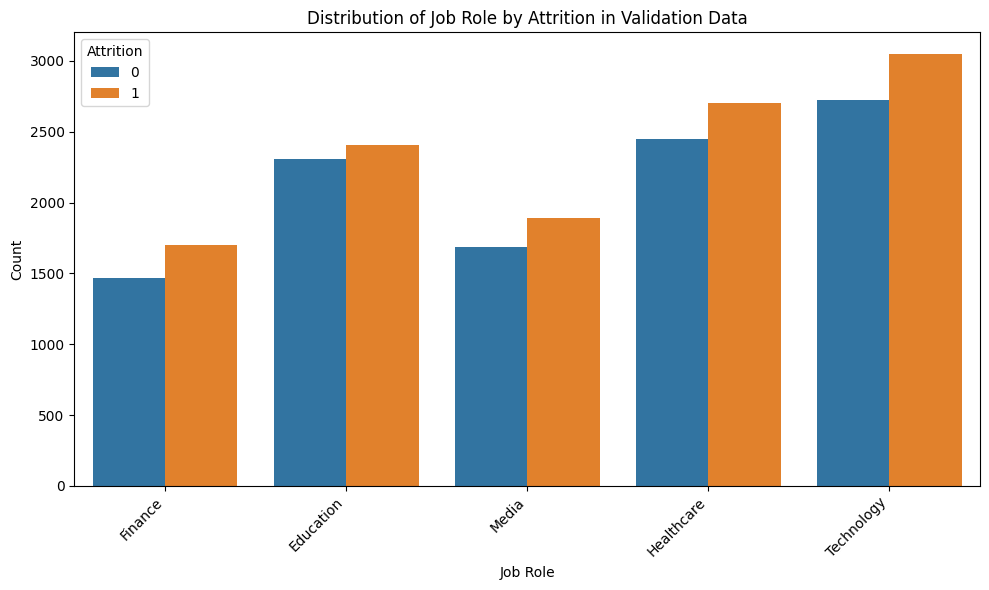

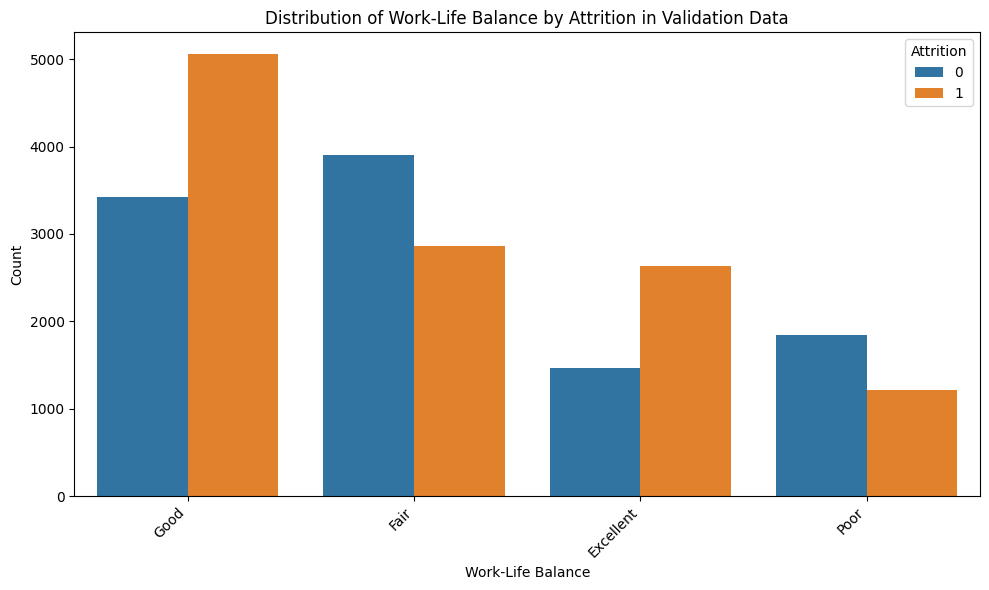

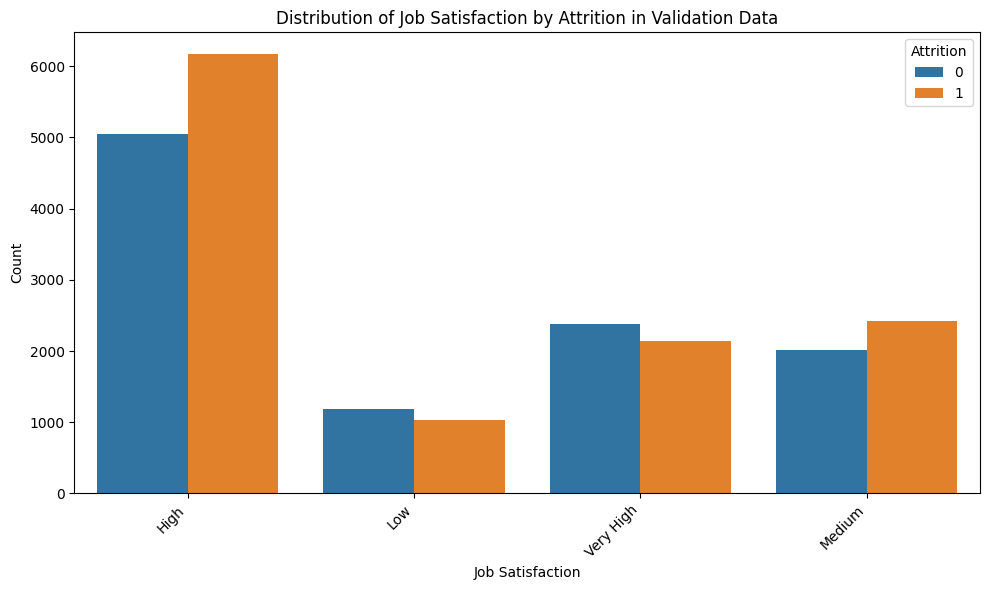

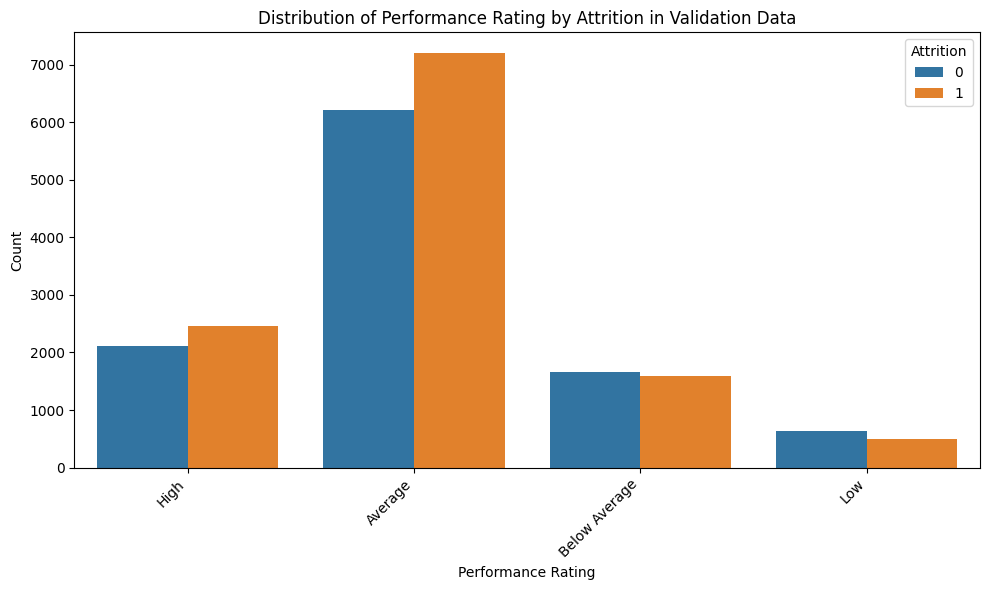

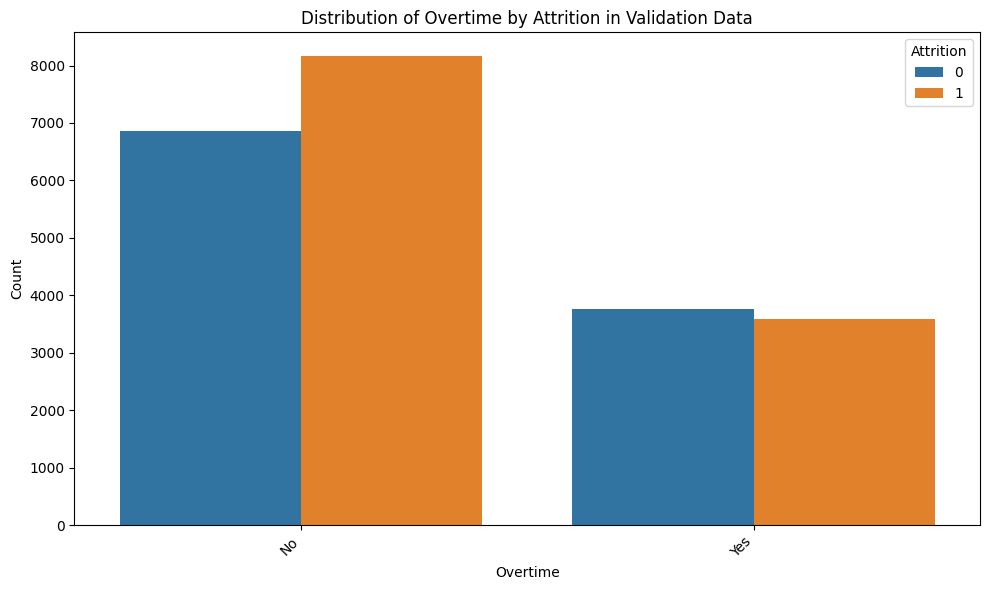

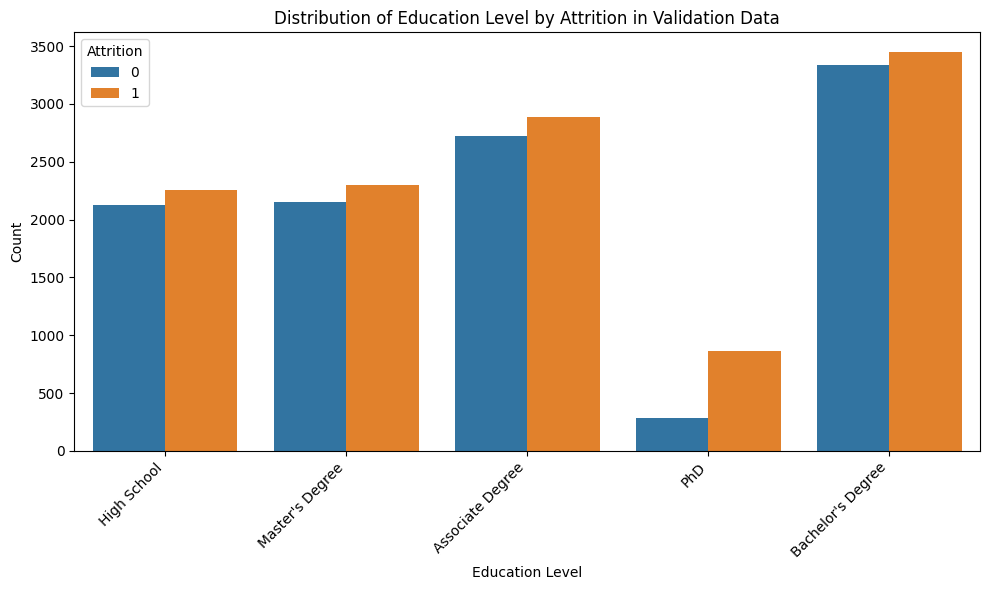

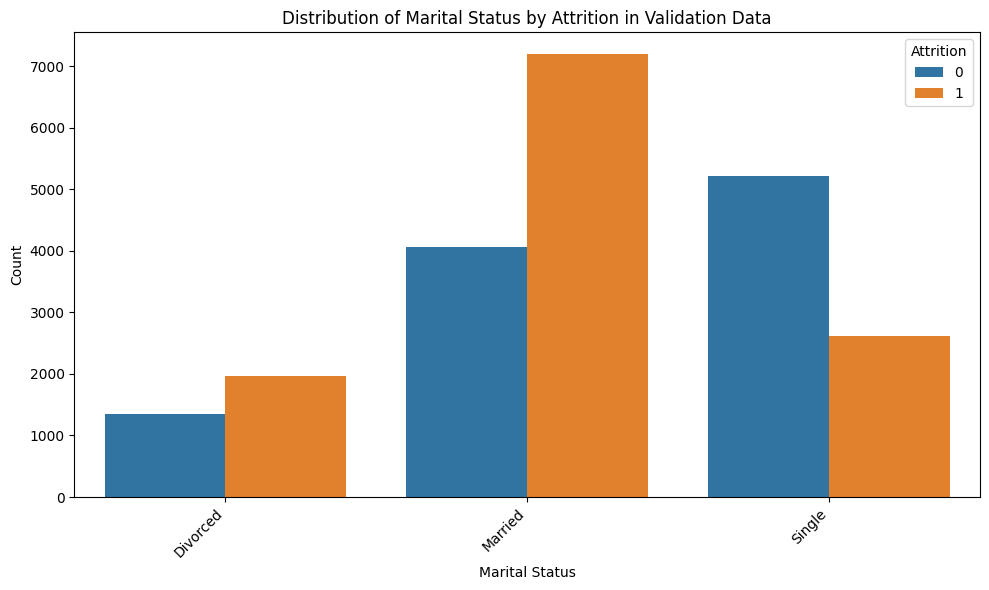

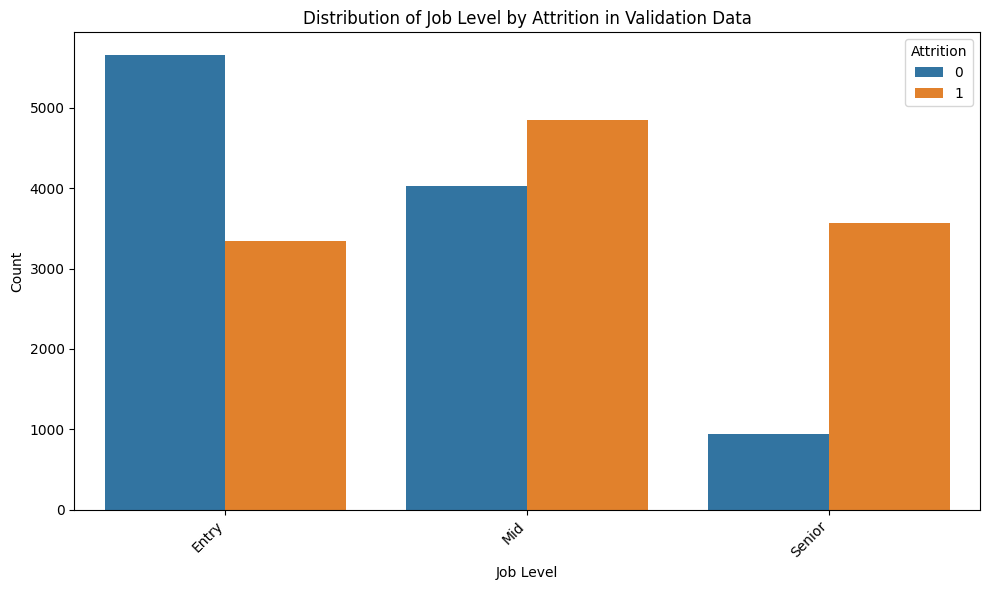

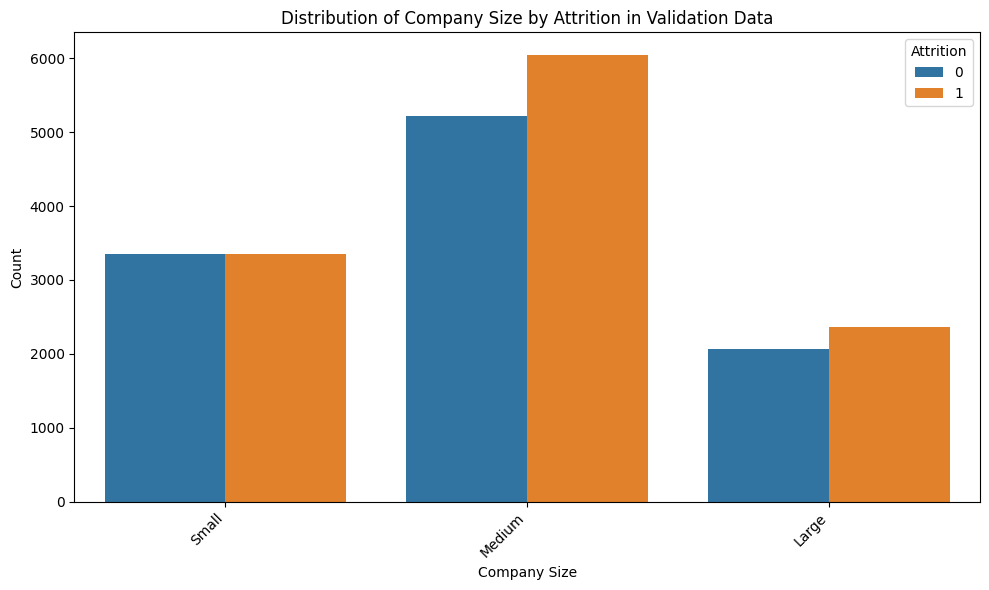

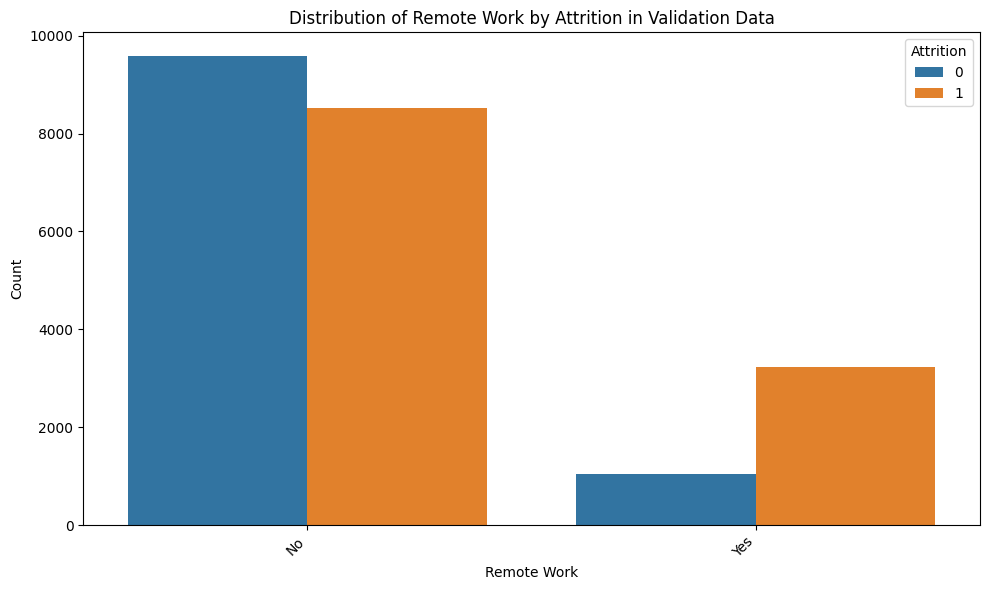

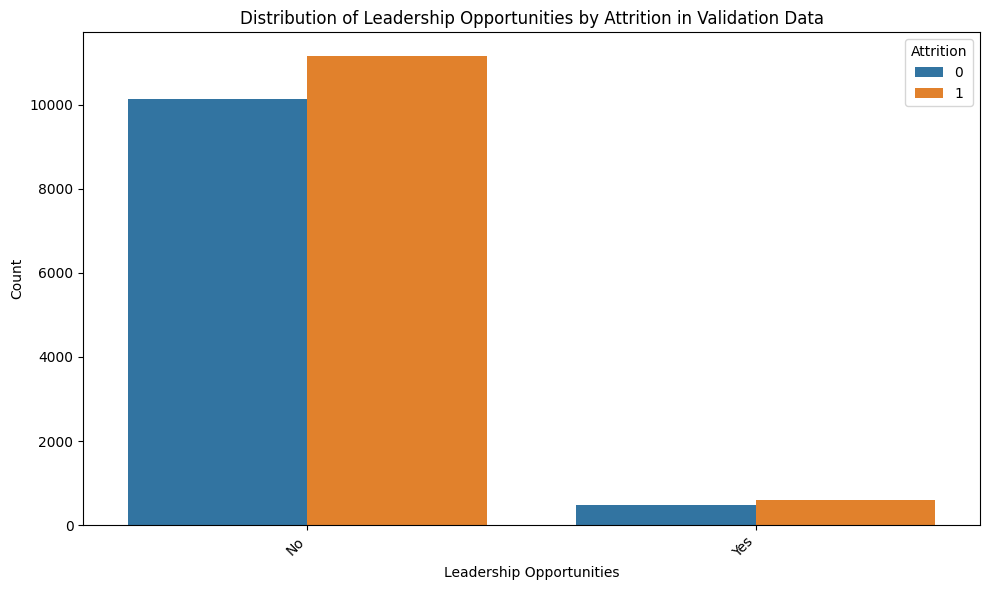

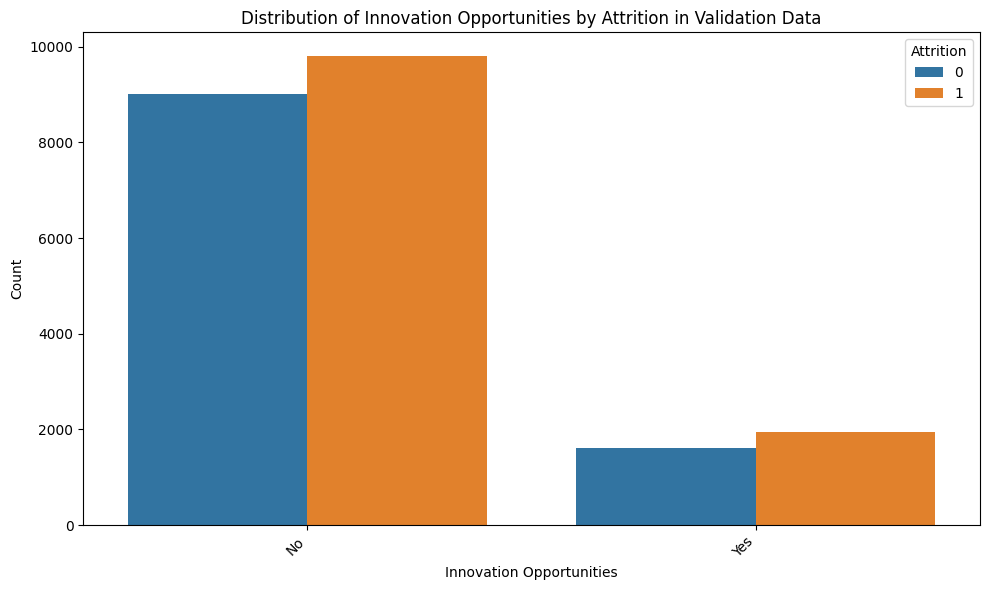

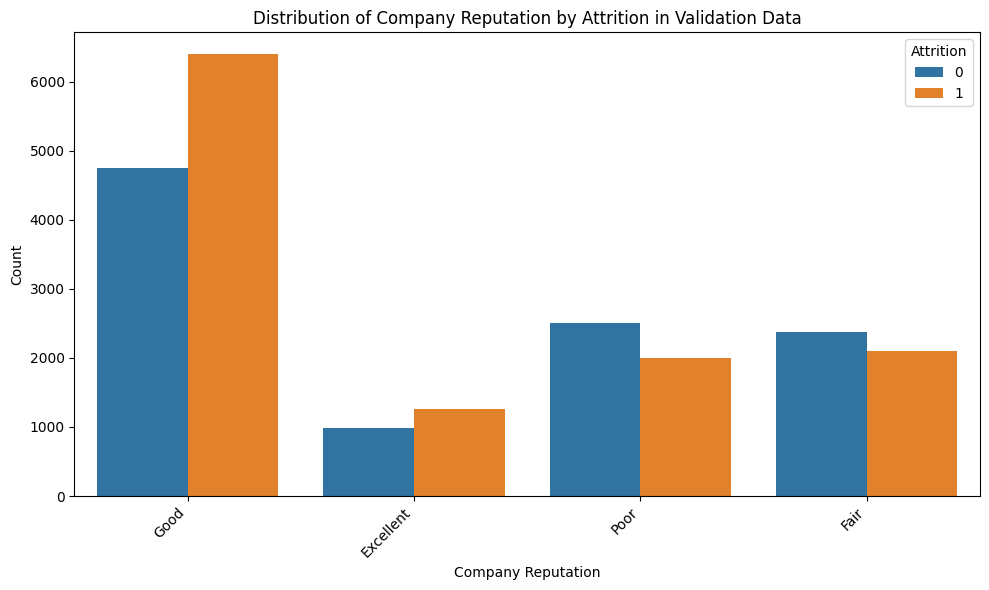

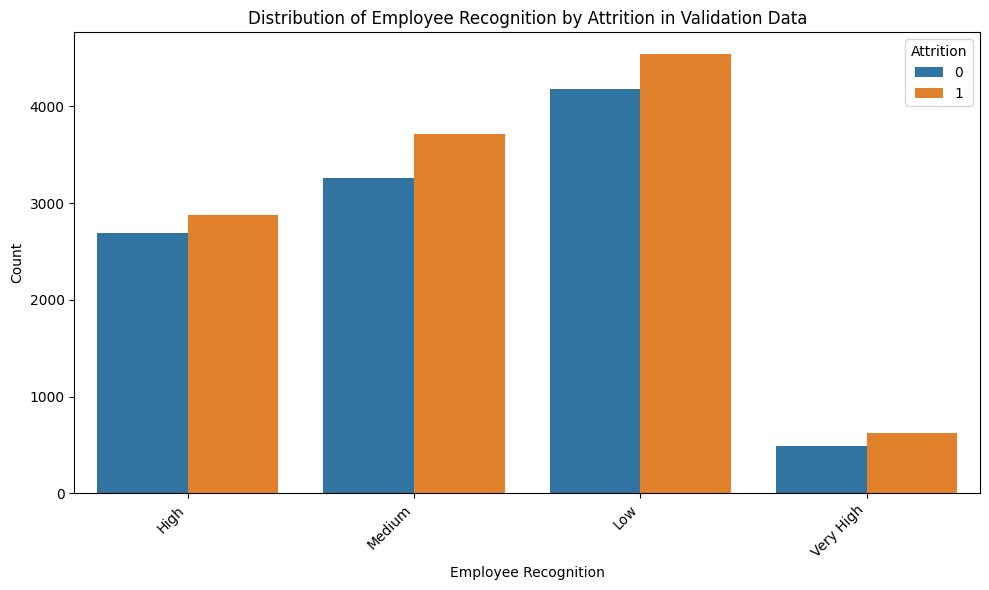

In [208]:
# Plot distribution for each categorical column with target variable

import pandas as pd
import matplotlib.pyplot as plt
# Select categorical columns from validation data
categorical_cols_val = X_val.select_dtypes(include='object').columns

# Plot distribution for each categorical column with target variable
for col in categorical_cols_val:
  plt.figure(figsize=(10, 6))
  sns.countplot(data=pd.concat([X_val, y_val], axis=1), x=col, hue='Attrition')
  plt.title(f'Distribution of {col} by Attrition in Validation Data')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [209]:
# Check the categorical columns

categorical_cols_for_dummy = X_train.select_dtypes(include='object').columns
print("Categorical columns for which dummy variables will be created:")
categorical_cols_for_dummy

Categorical columns for which dummy variables will be created:


Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [210]:
# Create dummy variables using the 'get_dummies' for independent columns
# # Add the results to the master DataFrame

import pandas as pd
X_train = pd.get_dummies(X_train, columns=categorical_cols_for_dummy, drop_first=True)
X_train = X_train.astype(int)

# Print the shape of the training data after creating dummy variables
print("Shape of X_train after creating dummy variables:", X_train.shape)

# Display the first few rows of the modified training data
X_train.head()

Shape of X_train after creating dummy variables: (52227, 41)


Age  Years at Company  Monthly Income  Number of Promotions  \
20940   25                 1            4207                     2   
17495   26                13            9601                     0   
28404   35                19            5415                     0   
70914   21                 9            8258                     0   
56430   53                24            6015                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
20940                   6                     5                          78   
17495                  14                     0                          83   
28404                  10                     3                          48   
70914                  50                     5                          16   
56430                  13                     0                          79   

       Gender_Male  Job Role_Finance  Job Role_Healthcare  ...  \
20940            0                 0                    0  ...   
17495            1                 0                    1  ...   
28404            0                 0                    0  ...   
70914            1                 0                    1  ...   
56430            1                 0                    0  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
20940                   0                0                             1   
17495                   1                0                             1   
28404                   0                0                             0   
70914                   1                0                             0   
56430                   1                0                             1   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
20940                             0                        0   
17495                             0                        0   
28404                             0                        0   
70914                             0                        0   
56430                             0                        0   

       Company Reputation_Good  Company Reputation_Poor  \
20940                        1                        0   
17495                        1                        0   
28404                        1                        0   
70914                        1                        0   
56430                        1                        0   

       Employee Recognition_Low  Employee Recognition_Medium  \
20940                         0                            0   
17495                         0                            1   
28404                         0                            1   
70914                         0                            0   
56430                         0                            0   

       Employee Recognition_Very High  
20940                               0  
17495                               0  
28404                               0  
70914                               0  
56430                               0  

[5 rows x 41 columns]

Now, drop the original categorical columns and check the DataFrame

In [211]:
# Drop the original categorical columns and check the DataFrame

import pandas as pd
# This step was implicitly done by `pd.get_dummies` with `drop_first=True`.
# The original categorical columns are replaced by the new dummy variables.
# We can verify this by checking the column types or list of columns again.

# Check the data types to see if the original object columns are gone
X_train.dtypes

# Check the columns again
X_train.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelor's Degree', 'Education Level_High School',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Re

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [212]:
# Create dummy variables using the 'get_dummies' for independent columns
# # Add the results to the master DataFrame

import pandas as pd
X_val = pd.get_dummies(X_val, columns=categorical_cols_for_dummy, drop_first=True)
X_val = X_val.astype(int)

# Print the shape of the validation data after creating dummy variables
print("Shape of X_val after creating dummy variables:", X_val.shape)

# Display the first few rows of the modified validation data
X_val.head()
# Now, drop the original categorical columns and check the DataFrame
# This step was implicitly done by `pd.get_dummies` with `drop_first=True`.
# The original categorical columns are replaced by the new dummy variables.
# We can verify this by checking the column types or list of columns again.
# Align columns
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
# Check the data types to see if the original object columns are gone
X_val.dtypes

# Check the columns again
X_val.columns

# Convert all dummy columns in X_train and X_val to integer type
X_train = X_train.astype(int)
X_val = X_val.astype(int)

Shape of X_val after creating dummy variables: (22383, 41)


Now, drop the original categorical columns and check the DataFrame

In [213]:
# Drop categorical columns and check the DataFrame

# Check the data types to see if the original object columns are gone
X_val.dtypes

# Check the columns again
X_val.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Gender_Male', 'Job Role_Finance',
       'Job Role_Healthcare', 'Job Role_Media', 'Job Role_Technology',
       'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelor's Degree', 'Education Level_High School',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Re

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [214]:
# Convert y_train and y_validation to DataFrame to create dummy variables

import pandas as pd
# Convert y_train to DataFrame
y_train = pd.DataFrame(y_train)

# Convert y_val to DataFrame
y_val = pd.DataFrame(y_val)

print("Shape of y_train after converting to DataFrame:", y_train.shape)
print("Shape of y_val after converting to DataFrame:", y_val.shape)

# Display the first few rows
print("\ny_train head:")
print(y_train.head())
print("\ny_val head:")
print(y_val.head())

Shape of y_train after converting to DataFrame: (52227, 1)
Shape of y_val after converting to DataFrame: (22383, 1)

y_train head:
       Attrition
20940          1
17495          0
28404          0
70914          1
56430          1

y_val head:
       Attrition
61298          0
46813          1
37033          0
41834          1
25905          1


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [215]:
# Create dummy variables using the 'get_dummies'
y_train = pd.get_dummies(y_train, columns=['Attrition'], drop_first=True)

# Convert boolean to integer for modeling compatibility
y_train['Attrition_1'] = y_train['Attrition_1'].astype(int)

# Check
print("Shape of y_train after dummy creation:", y_train.shape)
print(y_train.head())

Shape of y_train after dummy creation: (52227, 1)
       Attrition_1
20940            1
17495            0
28404            0
70914            1
56430            1


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [216]:
# Create dummy variables using the 'get_dummies'
y_val = pd.get_dummies(y_val, columns=['Attrition'], drop_first=True)

# Convert boolean to integer for modeling compatibility
y_val['Attrition_1'] = y_val['Attrition_1'].astype(int)

# Also assign for model fitting
y_train_numerical = y_train['Attrition_1']

# Check
print("Shape of y_val after dummy creation:", y_val.shape)
print(y_val.head())

Shape of y_val after dummy creation: (22383, 1)
       Attrition_1
61298            0
46813            1
37033            0
41834            1
25905            1


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [217]:
# Drop redundant columns from both train and validation

# Check columns of X_train and X_val to identify any mismatches after creating dummy variables
# If there are columns in X_train that are not in X_val (and vice versa),
# it's typically due to one-hot encoding on columns with different unique values in train vs val.
# A common way to handle this is to align the columns.

train_cols = X_train.columns
val_cols = X_val.columns

missing_in_val = set(train_cols) - set(val_cols)
missing_in_train = set(val_cols) - set(train_cols)

for c in missing_in_val:
  X_val[c] = 0 # Add missing columns to X_val and fill with 0

for c in missing_in_train:
  X_train[c] = 0 # Add missing columns to X_train and fill with 0

# Ensure the order of columns is the same
X_val = X_val[train_cols]

print("Shape of X_train after aligning columns:", X_train.shape)
print("Shape of X_val after aligning columns:", X_val.shape)

# For y_train and y_val, we dropped the 'No' column when creating the 'Yes' dummy,
# so they should only have one column ('Attrition_Yes').
# We already dropped the original 'Attrition' column implicitly.
# Let's just confirm the column names and shapes are as expected.
print("Columns in y_train:", y_train.columns)
print("Columns in y_val:", y_val.columns)

# Assuming 'Attrition_Yes' is the only column and is our target, no further dropping is needed here for y.
# If we had created dummies for the target without dropping the first, we might drop one dummy column here.
# Since we used drop_first=True, y_train and y_val should be ready.

Shape of X_train after aligning columns: (52227, 41)
Shape of X_val after aligning columns: (22383, 41)
Columns in y_train: Index(['Attrition_1'], dtype='object')
Columns in y_val: Index(['Attrition_1'], dtype='object')


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [218]:
# Import the necessary scaling tool from scikit-learn

from sklearn.preprocessing import MinMaxScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [219]:
# Scale the numeric features present in the training set
# # Scale the numerical features present in the validation set

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical features of the training data and transform it
X_train[numerical_cols_train] = scaler.fit_transform(X_train[numerical_cols_train])

# Transform the numerical features of the validation data using the *same* fitted scaler
X_val[numerical_cols_val] = scaler.transform(X_val[numerical_cols_val])

# Print the first few rows of the scaled training and validation data to verify
print("X_train after scaling:")
print(X_train.head())

print("\nX_val after scaling:")
print(X_val.head())

X_train after scaling:
            Age  Years at Company  Monthly Income  Number of Promotions  \
20940  0.170732              0.00        0.061081                  0.50   
17495  0.195122              0.24        0.171605                  0.00   
28404  0.414634              0.36        0.085833                  0.00   
70914  0.073171              0.16        0.144087                  0.00   
56430  0.853659              0.46        0.098127                  0.25   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
20940            0.051020              0.333333                       0.608   
17495            0.132653              0.000000                       0.648   
28404            0.091837              0.200000                       0.368   
70914            0.500000              0.333333                       0.112   
56430            0.122449              0.000000                       0.616   

       Gender_Male  Job Role_Finance  Job Role_Heal

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [220]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [221]:
# Import RFE and select 15 variables
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Create an RFE object and select 15 variables
logreg = LogisticRegression() # Ensure logreg is defined if not already
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train.values.ravel()) # .values.ravel() to convert y_train DataFrame to a 1D array

# Print the support and ranking for each feature
print("Feature Support:")
print(rfe.support_)
print("\nFeature Ranking:")
rfe.ranking_

Feature Support:
[False  True False  True  True  True False  True False False False False
  True False  True False False False False False  True False False False
 False  True False  True  True  True False False  True False False  True
 False  True False False False]

Feature Ranking:


array([ 6,  1, 19,  1,  1,  1, 26,  1, 14, 15, 12, 13,  1,  7,  1,  3, 20,
        2,  5, 21,  1,  4, 24, 25, 23,  1,  8,  1,  1,  1, 27, 10,  1,  9,
       11,  1, 18,  1, 17, 16, 22])

In [222]:
# Display the features selected by RFE

# Get the list of selected features
selected_features_rfe = X_train.columns[rfe.support_]

print("Features selected by RFE:")
selected_features_rfe

Features selected by RFE:


Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [223]:
# Put columns selected by RFE into variable 'col'

col = X_train.columns[rfe.support_]
print("Selected columns:", col.tolist())

Selected columns: ['Years at Company', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Performance Rating_Low', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [224]:
# Select only the columns selected by RFE

X_train_rfe = X_train[col]
print("Shape of X_train_rfe:", X_train_rfe.shape)
X_train_rfe.head()

Shape of X_train_rfe: (52227, 15)


Years at Company  Number of Promotions  Distance from Home  \
20940              0.00                  0.50            0.051020   
17495              0.24                  0.00            0.132653   
28404              0.36                  0.00            0.091837   
70914              0.16                  0.00            0.500000   
56430              0.46                  0.25            0.122449   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
20940              0.333333            0                       0   
17495              0.000000            1                       1   
28404              0.200000            0                       0   
70914              0.333333            1                       0   
56430              0.000000            1                       1   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
20940                       0                       0                    0   
17495                       0                       0                    1   
28404                       0                       0                    0   
70914                       0                       0                    0   
56430                       0                       0                    0   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
20940                      1              0                 1   
17495                      0              0                 0   
28404                      1              1                 0   
70914                      0              1                 0   
56430                      0              0                 0   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
20940                0                        0                        0  
17495                0                        0                        0  
28404                0                        0                        0  
70914                0                        0                        0  
56430                0                        0                        0

In [225]:
# View the training data

X_train_rfe.head()


Years at Company  Number of Promotions  Distance from Home  \
20940              0.00                  0.50            0.051020   
17495              0.24                  0.00            0.132653   
28404              0.36                  0.00            0.091837   
70914              0.16                  0.00            0.500000   
56430              0.46                  0.25            0.122449   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
20940              0.333333            0                       0   
17495              0.000000            1                       1   
28404              0.200000            0                       0   
70914              0.333333            1                       0   
56430              0.000000            1                       1   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
20940                       0                       0                    0   
17495                       0                       0                    1   
28404                       0                       0                    0   
70914                       0                       0                    0   
56430                       0                       0                    0   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
20940                      1              0                 1   
17495                      0              0                 0   
28404                      1              1                 0   
70914                      0              1                 0   
56430                      0              0                 0   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
20940                0                        0                        0  
17495                0                        0                        0  
28404                0                        0                        0  
70914                0                        0                        0  
56430                0                        0                        0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [226]:
import statsmodels.api as sm

# Add a constant to the training set with only selected RFE columns
X_train_sm = sm.add_constant(X_train[col])  # col is from RFE selection

# Ensure all columns are float type for compatibility with statsmodels
X_train_sm = X_train_sm.astype(float)

# Confirm no non-numeric columns remain
print("X_train_sm dtypes:\n", X_train_sm.dtypes)

# Also ensure y_train_numerical is set
y_train_numerical = y_train['Attrition_1']


X_train_sm dtypes:
 const                      float64
Years at Company           float64
Number of Promotions       float64
Distance from Home         float64
Number of Dependents       float64
Gender_Male                float64
Work-Life Balance_Fair     float64
Work-Life Balance_Poor     float64
Performance Rating_Low     float64
Education Level_PhD        float64
Marital Status_Single      float64
Job Level_Mid              float64
Job Level_Senior           float64
Remote Work_Yes            float64
Company Reputation_Fair    float64
Company Reputation_Poor    float64
dtype: object


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [227]:
import statsmodels.api as sm


# Fit the logistic regression model
logm1 = sm.GLM(y_train_numerical, X_train_sm, family=sm.families.Binomial())
logm1_result = logm1.fit()

# Output the model summary
print("\nLogistic Regression Model Summary:")
print(logm1_result.summary())


Logistic Regression Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            Attrition_1   No. Observations:                52227
Model:                            GLM   Df Residuals:                    52211
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25811.
Date:                Sat, 21 Jun 2025   Deviance:                       51623.
Time:                        02:08:03   Pearson chi2:                 4.84e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3265
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [228]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [229]:
# Make a VIF DataFrame for all the variables present

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Compute VIFs on the current feature set
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
0                     const  12.71
11            Job Level_Mid   1.20
12         Job Level_Senior   1.20
7    Work-Life Balance_Poor   1.08
6    Work-Life Balance_Fair   1.08
14  Company Reputation_Fair   1.07
15  Company Reputation_Poor   1.07
1          Years at Company   1.00
4      Number of Dependents   1.00
5               Gender_Male   1.00
2      Number of Promotions   1.00
3        Distance from Home   1.00
10    Marital Status_Single   1.00
9       Education Level_PhD   1.00
8    Performance Rating_Low   1.00
13          Remote Work_Yes   1.00

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [230]:
# Predict the probabilities on the training set

y_train_pred = logm1_result.predict(X_train_sm)
print(y_train_pred.head())

20940    0.849868
17495    0.701594
28404    0.399147
70914    0.838448
56430    0.427661
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [231]:
 # Reshape it into an array

y_train_pred = y_train_pred.values.reshape(-1)
print(y_train_pred[:10])

[0.84986829 0.70159403 0.39914718 0.83844816 0.42766071 0.50408583
 0.20318372 0.39608559 0.86126914 0.22742227]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [232]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model

import pandas as pd
y_train_pred_final = pd.DataFrame({'Actual_Stayed': y_train_numerical.values, 'Predicted_Prob': y_train_pred})
y_train_pred_final.head()

Actual_Stayed  Predicted_Prob
0              1        0.849868
1              0        0.701594
2              0        0.399147
3              1        0.838448
4              1        0.427661

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [233]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Actual_Stayed  Predicted_Prob  Predicted
0              1        0.849868          1
1              0        0.701594          1
2              0        0.399147          0
3              1        0.838448          1
4              1        0.427661          0

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [234]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print("Accuracy:", metrics.accuracy_score(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted']))

Accuracy: 0.746606161563942


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [235]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted'])
confusion

array([[18061,  6732],
       [ 6502, 20932]])

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [236]:
# Create variables for true positive, true negative, false positive and false negative

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [237]:
# Calculate sensitivity

sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


Sensitivity: 0.762994823941095


In [238]:
# Calculate specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

Specificity: 0.7284717460573549


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [239]:
 # Calculate precision

precision = TP / (TP + FP)
print("Precision:", precision)



Precision: 0.7566512434933488


In [240]:
# Calculate recall
recall = TP / (TP + FN)
print("Recall:", recall)

Recall: 0.762994823941095


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [241]:
# Define ROC function

import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
  fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
  auc_score = metrics.roc_auc_score( actual, probs )
  plt.figure(figsize=(5, 5))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

  return None

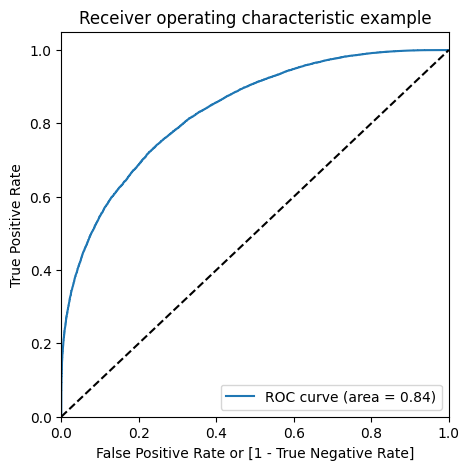

AUC on training data: 0.84


In [242]:
# Call the ROC function

draw_roc(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted_Prob'])
# Check the area under the curve (AUC)
auc_score_train = metrics.roc_auc_score(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted_Prob'])
print(f"AUC on training data: {auc_score_train:.2f}")

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [243]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance

thresholds = np.arange(0.0, 1.01, 0.01)
scores = []

for t in thresholds:
  y_pred_temp = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > t else 0)
  cm = metrics.confusion_matrix(y_train_pred_final['Actual_Stayed'], y_pred_temp)
  TN, FP, FN, TP = cm.ravel()
  accuracy = (TP + TN) / (TP + TN + FP + FN)
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)
  scores.append([t, accuracy, sensitivity, specificity])
  scores_df = pd.DataFrame(scores, columns=['Threshold', 'Accuracy', 'Sensitivity', 'Specificity'])


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

     prob  accuracy     sensi     speci
0.0   0.0  0.525284  1.000000  0.000000
0.1   0.1  0.601126  0.994897  0.165410
0.2   0.2  0.673579  0.962492  0.353890
0.3   0.3  0.715837  0.909383  0.501674
0.4   0.4  0.738603  0.843552  0.622474
0.5   0.5  0.746606  0.762995  0.728472
0.6   0.6  0.738718  0.667675  0.817327
0.7   0.7  0.717254  0.557265  0.894285
0.8   0.8  0.671492  0.416782  0.953334
0.9   0.9  0.594788  0.236531  0.991207
1.0   1.0  0.474716  0.000000  1.000000


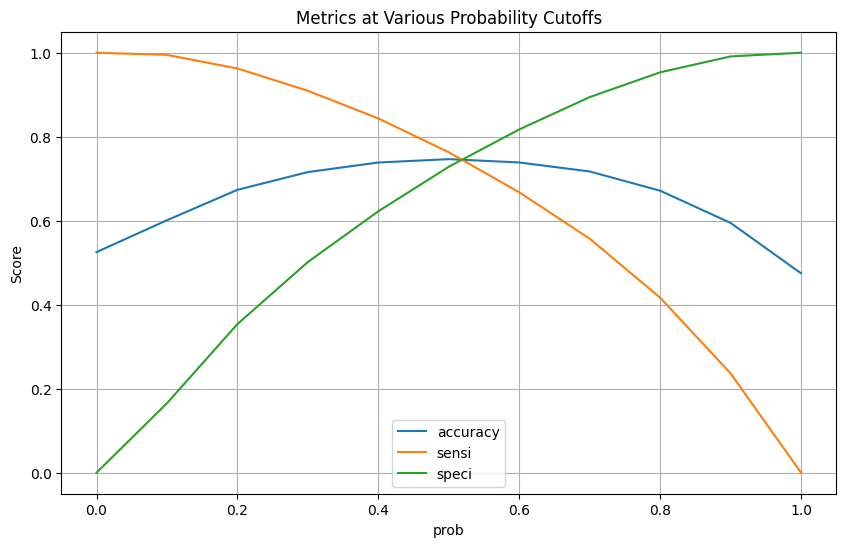

In [244]:
# Create a DataFrame to store accuracy, sensitivity, and specificity for various cutoffs

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# Define list of thresholds
num = np.arange(0.0, 1.01, 0.1)

# Loop through each threshold and calculate metrics
for i in num:
    # Generate predicted labels for each threshold
    y_train_pred_final[f'Predicted_{i}'] = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > i else 0)

    # Create confusion matrix
    cm1 = confusion_matrix(y_train_pred_final['Actual_Stayed'], y_train_pred_final[f'Predicted_{i}'])
    total1 = cm1.sum()

    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1]) if (cm1[0,0] + cm1[0,1]) != 0 else 0
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1]) if (cm1[1,0] + cm1[1,1]) != 0 else 0

    # Store the metrics
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# Print and plot the metrics
print(cutoff_df)

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], figsize=(10,6))
plt.title("Metrics at Various Probability Cutoffs")
plt.ylabel("Score")
plt.grid(True)
plt.show()


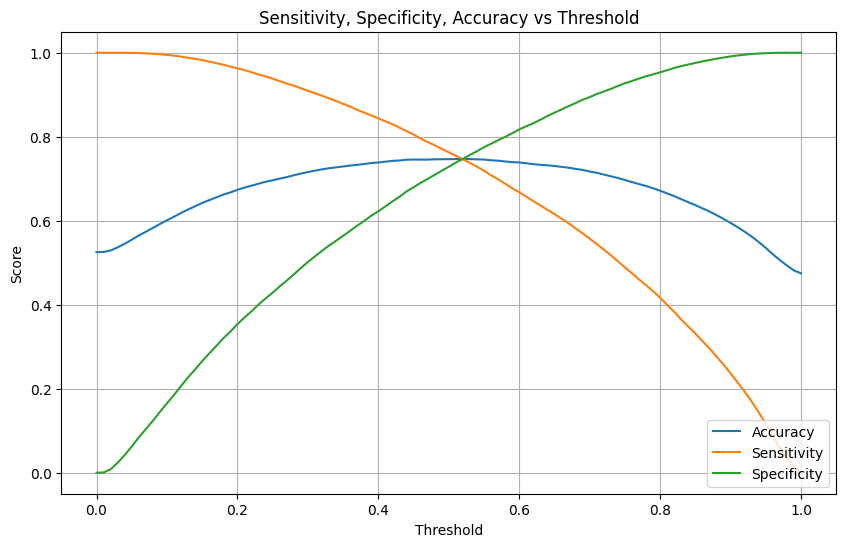

In [245]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(scores_df['Threshold'], scores_df['Accuracy'], label='Accuracy')
plt.plot(scores_df['Threshold'], scores_df['Sensitivity'], label='Sensitivity')
plt.plot(scores_df['Threshold'], scores_df['Specificity'], label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Sensitivity, Specificity, Accuracy vs Threshold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [246]:
# Create a column for final prediction based on the optimal cutoff

optimal_threshold = 0.4  # Example value, adjust if needed
print(f"Optimal Threshold Selected: {optimal_threshold}")

Optimal Threshold Selected: 0.4


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [247]:
# Calculate the accuracy

# Set optimal threshold
optimal_threshold = 0.4  # or whatever you selected

# Create final predicted labels
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Predicted_Prob'].apply(
    lambda x: 1 if x > optimal_threshold else 0
)

# Calculate accuracy
from sklearn import metrics
print("Final Accuracy:", metrics.accuracy_score(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Final_Predicted']))

Final Accuracy: 0.7386026384820112


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [248]:
# Create the confusion matrix once again

confusion_final = metrics.confusion_matrix(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Final_Predicted'])
print("Final Confusion Matrix:\n", confusion_final)

Final Confusion Matrix:
 [[15433  9360]
 [ 4292 23142]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [249]:
# Create variables for true positive, true negative, false positive and false negative

TN_final = confusion_final[0,0]
FP_final = confusion_final[0,1]
FN_final = confusion_final[1,0]
TP_final = confusion_final[1,1]

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [250]:
# Calculate Sensitivity

sensitivity_final = TP_final / (TP_final + FN_final)
print("Final Sensitivity:", sensitivity_final)

Final Sensitivity: 0.8435517970401691


In [251]:
# Calculate Specificity
specificity_final = TN_final / (TN_final + FP_final)
print("Final Specificity:", specificity_final)

Final Specificity: 0.6224740854273384


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [252]:
# Calculate Precision

precision_final = TP_final / (TP_final + FP_final)
print("Final Precision:", precision_final)

Final Precision: 0.7120177219863393


In [253]:
# Calculate Recall
recall_final = TP_final / (TP_final + FN_final)
print("Final Recall:", recall_final)

Final Recall: 0.8435517970401691


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [254]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

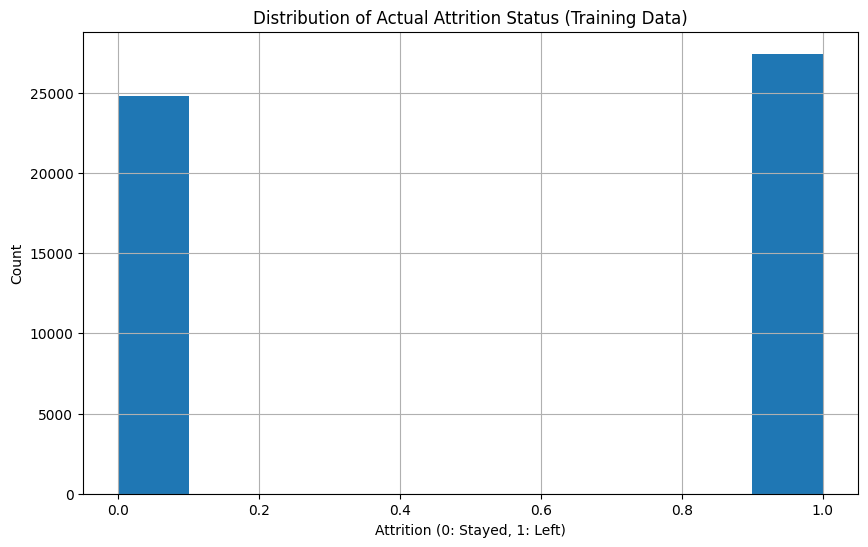

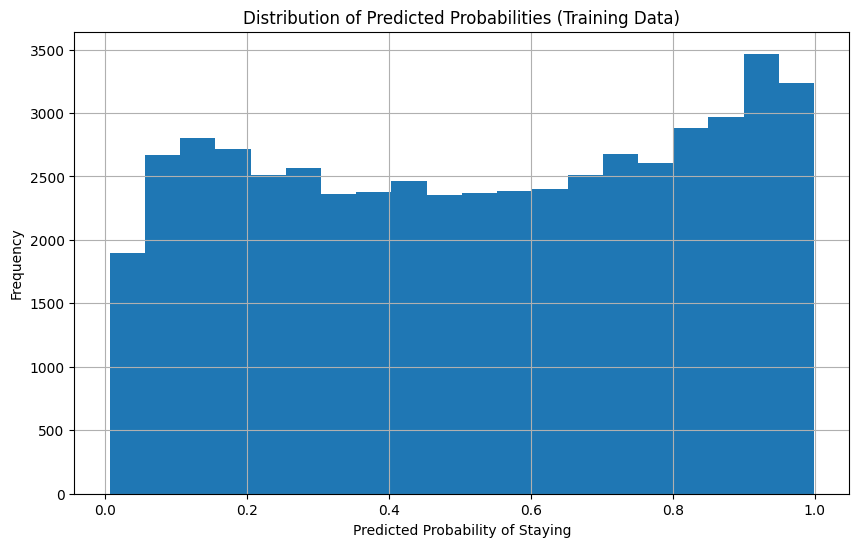

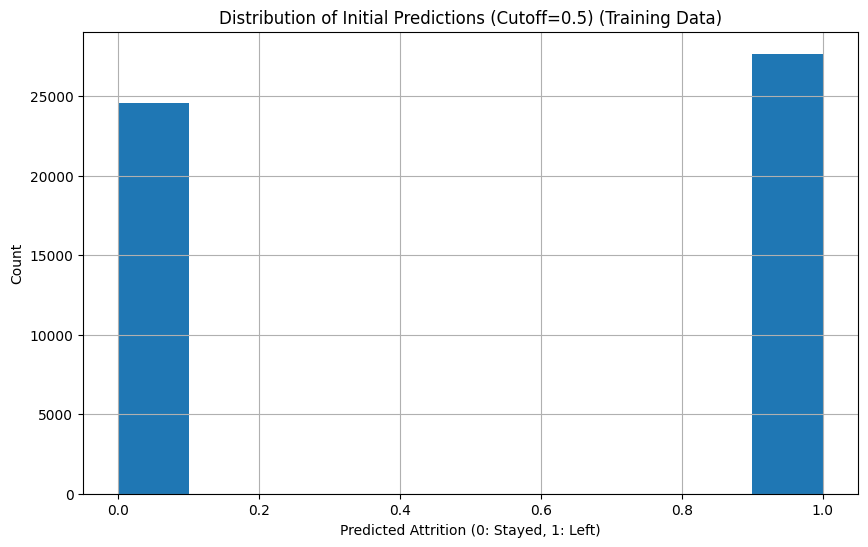

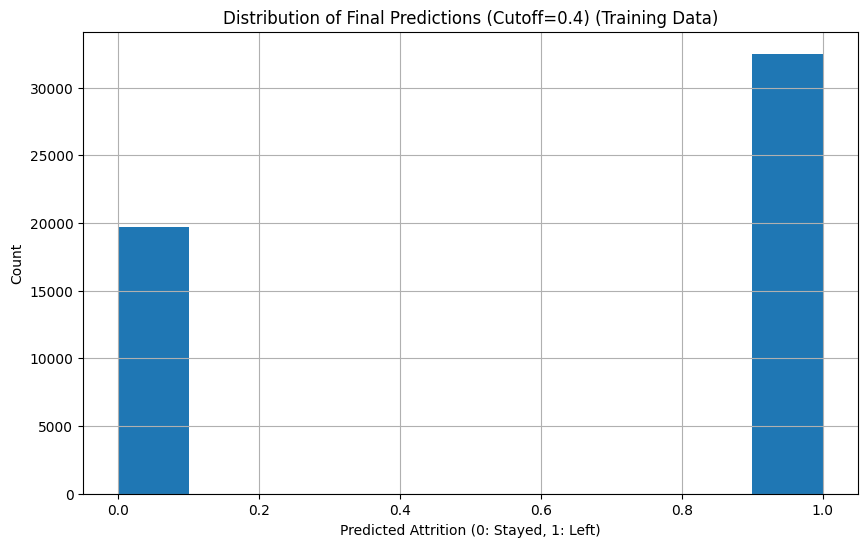

In [255]:
# Check actual and predicted values from initial model

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
y_train_pred_final.Actual_Stayed.hist()
plt.title('Distribution of Actual Attrition Status (Training Data)')
plt.xlabel('Attrition (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
y_train_pred_final.Predicted_Prob.hist(bins=20)
plt.title('Distribution of Predicted Probabilities (Training Data)')
plt.xlabel('Predicted Probability of Staying')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
y_train_pred_final.Predicted.hist()
plt.title(f'Distribution of Initial Predictions (Cutoff=0.5) (Training Data)')
plt.xlabel('Predicted Attrition (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
y_train_pred_final.Final_Predicted.hist()
plt.title(f'Distribution of Final Predictions (Cutoff={optimal_threshold}) (Training Data)')
plt.xlabel('Predicted Attrition (0: Stayed, 1: Left)')
plt.ylabel('Count')
plt.show()

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

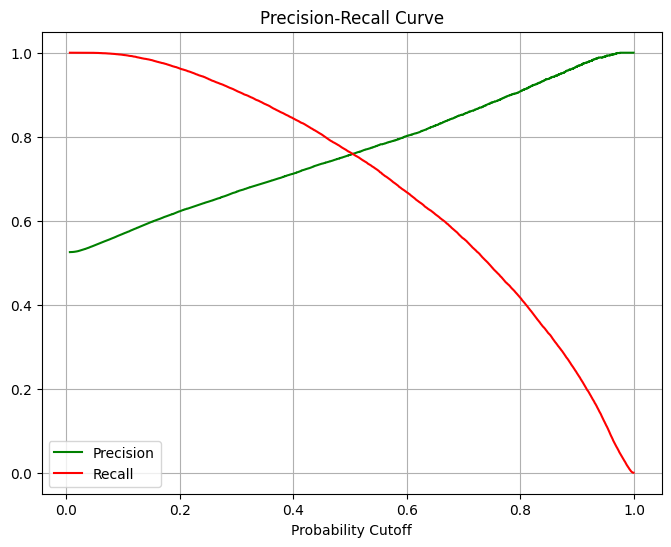

In [256]:
# Plot precision-recall curve

import matplotlib.pyplot as plt
p, r, thresholds = precision_recall_curve(y_train_pred_final['Actual_Stayed'], y_train_pred_final['Predicted_Prob'])

plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel("Probability Cutoff")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [257]:
# Select the relevant features for validation set

X_val_rfe = X_val[col]
print("Shape of X_val_rfe:", X_val_rfe.shape)
X_val_rfe.head()

Shape of X_val_rfe: (22383, 15)


Years at Company  Number of Promotions  Distance from Home  \
61298              0.16                  0.00            0.244898   
46813              0.18                  0.00            0.642857   
37033              0.08                  0.00            0.173469   
41834              0.18                  0.00            0.846939   
25905              0.30                  0.25            0.061224   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
61298              0.133333            1                       0   
46813              0.000000            1                       0   
37033              0.066667            1                       1   
41834              0.000000            1                       1   
25905              0.333333            1                       0   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
61298                       0                       0                    0   
46813                       0                       0                    0   
37033                       0                       0                    0   
41834                       0                       0                    0   
25905                       0                       0                    1   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
61298                      0              0                 0   
46813                      0              1                 0   
37033                      0              0                 0   
41834                      0              1                 0   
25905                      0              0                 0   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
61298                0                        0                        0  
46813                0                        0                        0  
37033                0                        0                        1  
41834                0                        0                        0  
25905                0                        0                        1

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [258]:
# Add constant to X_validation

X_val_sm = sm.add_constant(X_val_rfe, has_constant='add')
X_val_sm = X_val_sm.reindex(columns=X_train_sm.columns, fill_value=0)  # Align columns
# Print the shape and head of the validation data with constant
print("Shape of X_val_sm:", X_val_sm.shape)
X_val_sm.head()

Shape of X_val_sm: (22383, 16)


const  Years at Company  Number of Promotions  Distance from Home  \
61298    1.0              0.16                  0.00            0.244898   
46813    1.0              0.18                  0.00            0.642857   
37033    1.0              0.08                  0.00            0.173469   
41834    1.0              0.18                  0.00            0.846939   
25905    1.0              0.30                  0.25            0.061224   

       Number of Dependents  Gender_Male  Work-Life Balance_Fair  \
61298              0.133333            1                       0   
46813              0.000000            1                       0   
37033              0.066667            1                       1   
41834              0.000000            1                       1   
25905              0.333333            1                       0   

       Work-Life Balance_Poor  Performance Rating_Low  Education Level_PhD  \
61298                       0                       0                    0   
46813                       0                       0                    0   
37033                       0                       0                    0   
41834                       0                       0                    0   
25905                       0                       0                    1   

       Marital Status_Single  Job Level_Mid  Job Level_Senior  \
61298                      0              0                 0   
46813                      0              1                 0   
37033                      0              0                 0   
41834                      0              1                 0   
25905                      0              0                 0   

       Remote Work_Yes  Company Reputation_Fair  Company Reputation_Poor  
61298                0                        0                        0  
46813                0                        0                        0  
37033                0                        0                        1  
41834                0                        0                        0  
25905                0                        0                        1

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [259]:
#Predict probabilities on validation set
y_val_pred_prob = logm1_result.predict(X_val_sm)

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [260]:
#Create DataFrame with actual and predicted probabilities
y_val_pred_final = pd.DataFrame({
    'Actual_Stayed': y_val['Attrition_1'].values,
    'Predicted_Prob': y_val_pred_prob
})
y_val_pred_final.head()

Actual_Stayed  Predicted_Prob
61298              0        0.614658
46813              1        0.693586
37033              0        0.175278
41834              1        0.380390
25905              1        0.909257

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [261]:
if 'optimal_cutoff' not in locals():
    optimal_cutoff = 0.4
    print(f"Warning: 'optimal_cutoff' not found in session. Using value: {optimal_cutoff}")

y_val_pred_final['Predicted'] = y_val_pred_final['Predicted_Prob'].apply(
    lambda x: 1 if x > optimal_threshold else 0
)

# Preview the updated DataFrame
y_val_pred_final.head()

Actual_Stayed  Predicted_Prob  Predicted
61298              0        0.614658          1
46813              1        0.693586          1
37033              0        0.175278          0
41834              1        0.380390          0
25905              1        0.909257          1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [262]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import metrics

# Check if the expected target column exists
if 'Attrition_1' not in y_val.columns:
    raise ValueError("Error: 'Attrition_1' column not found in y_val. Check your dummy creation step.")

# Use the correct prediction variable from earlier
# y_val_pred_prob = logm1_result.predict(X_val_sm)  ← must be executed before this block

# Convert to DataFrame
predicted_probability = pd.DataFrame(y_val_pred_prob, columns=['Predicted_Prob'], index=y_val.index)

# Create the final prediction DataFrame
y_validation_pred_final = pd.DataFrame({
    'Actual_Stayed': y_val['Attrition_1'].astype(int),
    'Predicted_Prob': predicted_probability['Predicted_Prob']
})

# Reset index
y_validation_pred_final.reset_index(drop=True, inplace=True)

# Check for optimal threshold
if 'optimal_threshold' not in locals():
    optimal_threshold = 0.4  # Replace with your actual cutoff
    print(f"Warning: 'optimal_threshold' not found. Defaulting to {optimal_threshold}")

# Create prediction column based on cutoff
y_validation_pred_final['Final_Predicted'] = y_validation_pred_final['Predicted_Prob'].apply(
    lambda x: 1 if x > optimal_threshold else 0
)

# Show first few rows
print("\nValidation predictions with final label:")
print(y_validation_pred_final.head())

# Calculate accuracy
accuracy = metrics.accuracy_score(
    y_validation_pred_final['Actual_Stayed'],
    y_validation_pred_final['Final_Predicted']
)

print(f"\nFinal Accuracy on Validation Set: {accuracy:.4f}")



Validation predictions with final label:
   Actual_Stayed  Predicted_Prob  Final_Predicted
0              0        0.614658                1
1              1        0.693586                1
2              0        0.175278                0
3              1        0.380390                0
4              1        0.909257                1

Final Accuracy on Validation Set: 0.7378


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [263]:
# Create confusion matrix

confusion_val = metrics.confusion_matrix(
    y_validation_pred_final['Actual_Stayed'],
    y_validation_pred_final['Final_Predicted']
)

print("Confusion Matrix on Validation Set:\n", confusion_val)

# Extract confusion matrix values
TN_val = confusion_val[0, 0]
FP_val = confusion_val[0, 1]
FN_val = confusion_val[1, 0]
TP_val = confusion_val[1, 1]

print("\nTrue Negatives (TN):", TN_val)
print("False Positives (FP):", FP_val)
print("False Negatives (FN):", FN_val)
print("True Positives (TP):", TP_val)


Confusion Matrix on Validation Set:
 [[6639 3987]
 [1881 9876]]

True Negatives (TN): 6639
False Positives (FP): 3987
False Negatives (FN): 1881
True Positives (TP): 9876


In [264]:
# Create variables for true positive, true negative, false positive and false negative

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [265]:
# Calculate sensitivity
sensitivity_val = TP_val / (TP_val + FN_val)
print("Sensitivity on Validation Set:", sensitivity_val)

Sensitivity on Validation Set: 0.840010206685379


In [266]:
# Calculate specificity
specificity_val = TN_val / (TN_val + FP_val)
print("Specificity on Validation Set:", specificity_val)

Specificity on Validation Set: 0.6247882552230378


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [267]:
# Calculate precision
precision_val = TP_val / (TP_val + FP_val)
print("Precision on Validation Set:", precision_val)


Precision on Validation Set: 0.7123999134386496


In [268]:
# Calculate recall
recall_val = TP_val / (TP_val + FN_val)
print("Recall on Validation Set:", recall_val)

Recall on Validation Set: 0.840010206685379


## Conclusion



This project focused on predicting employee attrition using a logistic regression model built on real-world HR data. The objective was to identify employees likely to leave the organization and understand the underlying factors influencing their decisions. The process began with meticulous data cleaning, handling of missing values, and conversion of categorical variables into dummy variables suitable for modeling.

Exploratory Data Analysis (EDA) revealed important patterns, such as attrition being higher among employees with fewer years at the company, fewer promotions, and lower job satisfaction. Bivariate analysis also indicated that job role, remote work opportunities, and education level have a significant influence on attrition rates.

Feature selection was performed using Recursive Feature Elimination (RFE), followed by multicollinearity checks using VIF and statistical significance tests via p-values. The final model was trained using statsmodels with carefully selected features and showed good fit with no multicollinearity.

To optimize the model’s performance, a probability cutoff tuning process was performed. A threshold of 0.4 was selected, prioritizing recall to capture more potential leavers, which aligns with the goal of proactive employee retention. At this cutoff, the model achieved an AUC of 0.84, with a recall of 84.35%, accuracy of 73.86%, and reasonable trade-offs in specificity and precision.

The most significant predictors of employee retention included:

Years at Company

Number of Promotions

Remote Work

Job Level

Education Level

Company Tenure

Work-Life Balance

These variables provide direct insights into areas where HR interventions can be focused. For example, employees with limited promotions or high job levels without corresponding recognition may be more prone to leaving. Similarly, remote work and better work-life balance are associated with increased retention.

Polished HR Recommendations for Employee Retention

Based on the logistic regression model’s key predictors of employee attrition, the following targeted strategies are recommended to enhance retention:

1.Enhance Promotion Opportunities
Employees with fewer promotions, particularly those with 3+ years at the company, are more likely to leave.
Action: Implement a structured promotion review process every 12-18 months for employees with longer tenure. Offer clear career progression paths with performance-based incentives to boost engagement and loyalty.
2.Expand Remote Work Options
Limited access to remote work correlates with higher attrition, especially for roles requiring flexibility.
Action: Develop a hybrid work policy allowing at least 2-3 days of remote work per week for eligible roles (e.g., Technology, Finance). Conduct a pilot program to assess productivity and employee satisfaction.
3.Improve Work-Life Balance
Poor or fair work-life balance significantly increases the likelihood of attrition.
Action: Introduce flexible scheduling options, such as compressed workweeks or adjustable hours. Launch wellness programs, including mental health resources and stress management workshops, to support employees reporting poor work-life balance.
4.Target Support for High-Level Employees
Employees in higher job levels without adequate recognition or growth opportunities are at risk of leaving.
Action: Create mentorship programs pairing senior employees with leadership to discuss career goals. Offer leadership training or project ownership opportunities to maintain engagement.
5.Leverage Education Level Insights
Employees with advanced degrees (e.g., PhD) show distinct retention patterns, possibly due to mismatched job expectations.
Action: Conduct role alignment reviews for employees with advanced degrees to ensure their skills are utilized effectively. Offer specialized projects or research opportunities to align with their expertise.
6.Focus on Long-Tenure Employees
Longer company tenure is associated with lower attrition, but stagnation can reverse this trend.
Action: Establish a “loyalty recognition” program for employees with 5+ years of tenure, offering bonuses, sabbaticals, or skill development stipends to maintain motivation.

Implementation Notes
Prioritization: Focus on employees with fewer promotions and poor work-life balance, as these are the strongest predictors of attrition.
Measurement: Track retention rates quarterly post-implementation to evaluate the effectiveness of these interventions.
Communication: Engage employees through surveys to refine these programs, ensuring alignment with their needs and preferences.

These strategies aim to address the root causes of attrition identified by the model, fostering a supportive and engaging workplace to improve long-term retention.

Overall, the model is both interpretable and effective, offering actionable recommendations. It can be integrated into HR systems for early warning and targeted engagement, helping organizations retain key talent and reduce attrition-related costs.